# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

This notebook includes feature evaluation with statsmodels and dmatrices and with Pipelines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from patsy import dmatrices

from numpy import arange

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

### Load the data from github repository

In [3]:
inputs_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/tp_sqrt_inputs_df.csv'
interim_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/interim_df.csv'
final_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_df.csv'
pts_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_points_lookup.csv'

In [4]:
inputs_init = pd.read_csv(inputs_path)

In [5]:
interim_init = pd.read_csv(interim_path)

In [6]:
final_init = pd.read_csv(final_path)

In [7]:
pts_final_lookup = pd.read_csv(pts_path)

In [8]:
inputs_init.columns

Index(['sess', 'sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqr

In [9]:
interim_init.columns

Index(['sid', 'interim_scr2', 'interim_scr3', 'interim_scr4', 'interim_scr5',
       'interim_scr6'],
      dtype='object')

In [10]:
final_init.columns

Index(['sid', 'Es_1q1', 'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2',
       'Es_3q3', 'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2',
       'Es_5q3', 'Es_6q1', 'Es_6q2', 'final_score'],
      dtype='object')

In [11]:
pts_final_lookup.columns

Index(['question', 'question_points'], dtype='object')

In [12]:
inputs_init.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mwc_tp100_sqrt         0
mcl_tp100_sqrt         0
mcr_tp100_sqrt         0
mm_tp100_sqrt          0
ks_tp100_sqrt          0
Length: 80, dtype: int64

In [13]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 4248 non-null   int64  
 1   sid                  4248 non-null   int64  
 2   actv_grp             4248 non-null   object 
 3   total_ms_tp000_sqrt  4248 non-null   float64
 4   mw_tp000_sqrt        4248 non-null   float64
 5   mwc_tp000_sqrt       4248 non-null   float64
 6   mcl_tp000_sqrt       4248 non-null   float64
 7   mcr_tp000_sqrt       4248 non-null   float64
 8   mm_tp000_sqrt        4248 non-null   float64
 9   ks_tp000_sqrt        4248 non-null   float64
 10  total_ms_tp010_sqrt  4248 non-null   float64
 11  mw_tp010_sqrt        4248 non-null   float64
 12  mwc_tp010_sqrt       4248 non-null   float64
 13  mcl_tp010_sqrt       4248 non-null   float64
 14  mcr_tp010_sqrt       4248 non-null   float64
 15  mm_tp010_sqrt        4248 non-null   f

In [14]:
inputs_init['sid'] = inputs_init['sid'].astype('object')
inputs_init['sess'] = inputs_init['sess'].astype('object')

In [15]:
inputs_df = inputs_init.copy()

In [16]:
interim_df = interim_init.copy()

### Melt interim_df and create a `session` variable to merge with inputs_df by session and student_id

In [17]:
interim_lf = interim_df.melt( id_vars=['sid']).\
             rename(columns={"variable": "interim_sess", "value": "interim_scr"}).\
             copy()

In [18]:
interim_lf['sess'] = interim_lf.interim_sess.str.extract('(\d+)')

In [19]:
interim_lf

sid  interim_sess  interim_scr sess
0      1  interim_scr2          5.0    2
1      2  interim_scr2          4.0    2
2      3  interim_scr2          3.5    2
3      4  interim_scr2          6.0    2
4      5  interim_scr2          5.0    2
..   ...           ...          ...  ...
570  111  interim_scr6          0.0    6
571  112  interim_scr6          0.0    6
572  113  interim_scr6          0.0    6
573  114  interim_scr6          0.0    6
574  115  interim_scr6          0.0    6

[575 rows x 4 columns]

In [20]:
interim_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           575 non-null    int64  
 1   interim_sess  575 non-null    object 
 2   interim_scr   575 non-null    float64
 3   sess          575 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 18.1+ KB


### Merge inputs_df with interim_lf 

In [21]:
interim_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           575 non-null    int64  
 1   interim_sess  575 non-null    object 
 2   interim_scr   575 non-null    float64
 3   sess          575 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 18.1+ KB


In [22]:
interim_lf.isna().sum()

sid             0
interim_sess    0
interim_scr     0
sess            0
dtype: int64

In [23]:
interim_lf

sid  interim_sess  interim_scr sess
0      1  interim_scr2          5.0    2
1      2  interim_scr2          4.0    2
2      3  interim_scr2          3.5    2
3      4  interim_scr2          6.0    2
4      5  interim_scr2          5.0    2
..   ...           ...          ...  ...
570  111  interim_scr6          0.0    6
571  112  interim_scr6          0.0    6
572  113  interim_scr6          0.0    6
573  114  interim_scr6          0.0    6
574  115  interim_scr6          0.0    6

[575 rows x 4 columns]

In [24]:
interim_lf['sess'] = interim_lf['sess'].astype('int')

In [25]:
io_init = pd.merge(inputs_df, interim_lf, on=['sid', 'sess'], how='left').drop(columns=['interim_sess'])

In [26]:
io_df = io_init.loc[io_init.sess != 1].dropna().copy()

In [27]:
io_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642 entries, 606 to 4247
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   object 
 1   sid                  3642 non-null   object 
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null  

In [28]:
io_df.sess.unique()

array([2, 3, 4, 5, 6], dtype=object)

### Generate the output and input feature arrays using the formula interface

In [29]:
io_df.columns

Index(['sess', 'sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqr

In [30]:
def get_var_list(df, lst):
    temp = []
    for s in lst:
        temp = [j for i in [temp, df.loc[:, df.columns.str.endswith(s)].columns] for j in i] 
    return temp

In [31]:
num_vars = get_var_list(io_df,['sqrt'])

In [32]:
num_vars

['total_ms_tp000_sqrt',
 'mw_tp000_sqrt',
 'mwc_tp000_sqrt',
 'mcl_tp000_sqrt',
 'mcr_tp000_sqrt',
 'mm_tp000_sqrt',
 'ks_tp000_sqrt',
 'total_ms_tp010_sqrt',
 'mw_tp010_sqrt',
 'mwc_tp010_sqrt',
 'mcl_tp010_sqrt',
 'mcr_tp010_sqrt',
 'mm_tp010_sqrt',
 'ks_tp010_sqrt',
 'total_ms_tp020_sqrt',
 'mw_tp020_sqrt',
 'mwc_tp020_sqrt',
 'mcl_tp020_sqrt',
 'mcr_tp020_sqrt',
 'mm_tp020_sqrt',
 'ks_tp020_sqrt',
 'total_ms_tp030_sqrt',
 'mw_tp030_sqrt',
 'mwc_tp030_sqrt',
 'mcl_tp030_sqrt',
 'mcr_tp030_sqrt',
 'mm_tp030_sqrt',
 'ks_tp030_sqrt',
 'total_ms_tp040_sqrt',
 'mw_tp040_sqrt',
 'mwc_tp040_sqrt',
 'mcl_tp040_sqrt',
 'mcr_tp040_sqrt',
 'mm_tp040_sqrt',
 'ks_tp040_sqrt',
 'total_ms_tp050_sqrt',
 'mw_tp050_sqrt',
 'mwc_tp050_sqrt',
 'mcl_tp050_sqrt',
 'mcr_tp050_sqrt',
 'mm_tp050_sqrt',
 'ks_tp050_sqrt',
 'total_ms_tp060_sqrt',
 'mw_tp060_sqrt',
 'mwc_tp060_sqrt',
 'mcl_tp060_sqrt',
 'mcr_tp060_sqrt',
 'mm_tp060_sqrt',
 'ks_tp060_sqrt',
 'total_ms_tp070_sqrt',
 'mw_tp070_sqrt',
 'mwc_tp070_s

In [33]:
len(num_vars)

77

In [34]:
num_features_str = ''
for ix, x in enumerate(num_vars):
    if ix == len(num_vars) - 1:
        num_features_str = num_features_str + x
    else:
        num_features_str = num_features_str + x + ' + '
num_features_str

'total_ms_tp000_sqrt + mw_tp000_sqrt + mwc_tp000_sqrt + mcl_tp000_sqrt + mcr_tp000_sqrt + mm_tp000_sqrt + ks_tp000_sqrt + total_ms_tp010_sqrt + mw_tp010_sqrt + mwc_tp010_sqrt + mcl_tp010_sqrt + mcr_tp010_sqrt + mm_tp010_sqrt + ks_tp010_sqrt + total_ms_tp020_sqrt + mw_tp020_sqrt + mwc_tp020_sqrt + mcl_tp020_sqrt + mcr_tp020_sqrt + mm_tp020_sqrt + ks_tp020_sqrt + total_ms_tp030_sqrt + mw_tp030_sqrt + mwc_tp030_sqrt + mcl_tp030_sqrt + mcr_tp030_sqrt + mm_tp030_sqrt + ks_tp030_sqrt + total_ms_tp040_sqrt + mw_tp040_sqrt + mwc_tp040_sqrt + mcl_tp040_sqrt + mcr_tp040_sqrt + mm_tp040_sqrt + ks_tp040_sqrt + total_ms_tp050_sqrt + mw_tp050_sqrt + mwc_tp050_sqrt + mcl_tp050_sqrt + mcr_tp050_sqrt + mm_tp050_sqrt + ks_tp050_sqrt + total_ms_tp060_sqrt + mw_tp060_sqrt + mwc_tp060_sqrt + mcl_tp060_sqrt + mcr_tp060_sqrt + mm_tp060_sqrt + ks_tp060_sqrt + total_ms_tp070_sqrt + mw_tp070_sqrt + mwc_tp070_sqrt + mcl_tp070_sqrt + mcr_tp070_sqrt + mm_tp070_sqrt + ks_tp070_sqrt + total_ms_tp080_sqrt + mw_tp080_

In [35]:
descriptive_formulas = ['interim_scr ~ sid',
                    'interim_scr ~ sid + actv_grp',
                    'interim_scr ~ sid + actv_grp + ' + num_features_str,
                    'interim_scr ~ sid * (' + num_features_str + ')',
                    'interim_scr ~ sid * (actv_grp + ' + num_features_str + ')']

In [36]:
predictive_formulas = ['interim_scr ~ ' + num_features_str,
                    'interim_scr ~ (' + num_features_str + ')**2',
                    'interim_scr ~ actv_grp + ' + num_features_str,
                    'interim_scr ~ actv_grp * (' + num_features_str + ')',
                    'interim_scr ~ actv_grp + (' + num_features_str + ')**2',
                     'interim_scr ~ actv_grp * (' + num_features_str + ')**2']

In [37]:
formula_list = descriptive_formulas + predictive_formulas

In [38]:
formula_list

['interim_scr ~ sid',
 'interim_scr ~ sid + actv_grp',
 'interim_scr ~ sid + actv_grp + total_ms_tp000_sqrt + mw_tp000_sqrt + mwc_tp000_sqrt + mcl_tp000_sqrt + mcr_tp000_sqrt + mm_tp000_sqrt + ks_tp000_sqrt + total_ms_tp010_sqrt + mw_tp010_sqrt + mwc_tp010_sqrt + mcl_tp010_sqrt + mcr_tp010_sqrt + mm_tp010_sqrt + ks_tp010_sqrt + total_ms_tp020_sqrt + mw_tp020_sqrt + mwc_tp020_sqrt + mcl_tp020_sqrt + mcr_tp020_sqrt + mm_tp020_sqrt + ks_tp020_sqrt + total_ms_tp030_sqrt + mw_tp030_sqrt + mwc_tp030_sqrt + mcl_tp030_sqrt + mcr_tp030_sqrt + mm_tp030_sqrt + ks_tp030_sqrt + total_ms_tp040_sqrt + mw_tp040_sqrt + mwc_tp040_sqrt + mcl_tp040_sqrt + mcr_tp040_sqrt + mm_tp040_sqrt + ks_tp040_sqrt + total_ms_tp050_sqrt + mw_tp050_sqrt + mwc_tp050_sqrt + mcl_tp050_sqrt + mcr_tp050_sqrt + mm_tp050_sqrt + ks_tp050_sqrt + total_ms_tp060_sqrt + mw_tp060_sqrt + mwc_tp060_sqrt + mcl_tp060_sqrt + mcr_tp060_sqrt + mm_tp060_sqrt + ks_tp060_sqrt + total_ms_tp070_sqrt + mw_tp070_sqrt + mwc_tp070_sqrt + mcl_tp070_

In [39]:
complx_model = formula_list[10]
complx_model

'interim_scr ~ actv_grp * (total_ms_tp000_sqrt + mw_tp000_sqrt + mwc_tp000_sqrt + mcl_tp000_sqrt + mcr_tp000_sqrt + mm_tp000_sqrt + ks_tp000_sqrt + total_ms_tp010_sqrt + mw_tp010_sqrt + mwc_tp010_sqrt + mcl_tp010_sqrt + mcr_tp010_sqrt + mm_tp010_sqrt + ks_tp010_sqrt + total_ms_tp020_sqrt + mw_tp020_sqrt + mwc_tp020_sqrt + mcl_tp020_sqrt + mcr_tp020_sqrt + mm_tp020_sqrt + ks_tp020_sqrt + total_ms_tp030_sqrt + mw_tp030_sqrt + mwc_tp030_sqrt + mcl_tp030_sqrt + mcr_tp030_sqrt + mm_tp030_sqrt + ks_tp030_sqrt + total_ms_tp040_sqrt + mw_tp040_sqrt + mwc_tp040_sqrt + mcl_tp040_sqrt + mcr_tp040_sqrt + mm_tp040_sqrt + ks_tp040_sqrt + total_ms_tp050_sqrt + mw_tp050_sqrt + mwc_tp050_sqrt + mcl_tp050_sqrt + mcr_tp050_sqrt + mm_tp050_sqrt + ks_tp050_sqrt + total_ms_tp060_sqrt + mw_tp060_sqrt + mwc_tp060_sqrt + mcl_tp060_sqrt + mcr_tp060_sqrt + mm_tp060_sqrt + ks_tp060_sqrt + total_ms_tp070_sqrt + mw_tp070_sqrt + mwc_tp070_sqrt + mcl_tp070_sqrt + mcr_tp070_sqrt + mm_tp070_sqrt + ks_tp070_sqrt + total

#### Evaluate formula features

In [40]:
def make_dmat(df, formula_list):
    
    sk_list = []

    for a_formula in formula_list:
        y_sk, X_sk = dmatrices(a_formula, data = df)
        sk_list.append( [y_sk, X_sk] )
        
    return sk_list

In [41]:
def make_dim_df(df, sk_list, formula_list):
        
    model_dim = pd.DataFrame({'model name': [x for x in range(0,len(formula_list))],
                          'dimensions': [dim[1].shape[1] for dim in sk_list],
                          'number of obs': [len(df) for x in range(0,len(formula_list))],
                          'dim < obs': ['Yes' if dim[1].shape[1] < len(df) else 'No' for dim in sk_list]})
    return model_dim

##### Session 2

In [42]:
s2_df = io_df[ io_df['sess'] == 2 ].copy()

In [43]:
s2_df

sess  sid    actv_grp  total_ms_tp000_sqrt  mw_tp000_sqrt  \
606     2    1     Aulaweb          1236.122971      16.643317   
607     2    1       Blank           216.794834       2.645751   
608     2    1       Deeds            70.710678       0.000000   
609     2    1     Diagram           604.979338       4.472136   
610     2    1       Other           771.362431       4.472136   
...   ...  ...         ...                  ...            ...   
1254    2  104     Diagram           412.310563       3.464102   
1255    2  104       Other           134.164079       1.732051   
1256    2  104  Properties           800.000000      12.206556   
1257    2  104       Study           404.969135       3.464102   
1258    2  104  TextEditor           141.421356       2.449490   

      mwc_tp000_sqrt  mcl_tp000_sqrt  mcr_tp000_sqrt  mm_tp000_sqrt  \
606              0.0       25.278449        1.414214     224.784341   
607              0.0        4.582576        0.000000      46.808119   
608              0.0        2.449490        0.000000      21.260292   
609              0.0       14.832397        0.000000     117.085439   
610              0.0       16.852300        0.000000     151.650915   
...              ...             ...             ...            ...   
1254             0.0       11.747340        0.000000      74.959989   
1255             0.0        1.414214        0.000000      23.151674   
1256             0.0       18.000000        2.000000     151.367103   
1257             0.0       11.401754        0.000000      71.798329   
1258             0.0        2.000000        0.000000      25.219040   

      ks_tp000_sqrt  ...  mm_tp090_sqrt  ks_tp090_sqrt  total_ms_tp100_sqrt  \
606       37.496667  ...     486.501593      51.314715          2760.796986   
607        2.828427  ...     494.317509      52.801515          2930.699575   
608        0.000000  ...     501.163047      54.166410          2928.310093   
609       14.352700  ...     525.389950      54.896266          2927.968579   
610       14.352700  ...     521.050669      54.721111          2933.087111   
...             ...  ...            ...            ...                  ...   
1254      15.874508  ...     381.201522      59.841457          2703.146315   
1255       0.000000  ...     417.693309      64.023433          2738.795356   
1256      27.294688  ...     247.365721      36.573214          2688.308018   
1257      15.874508  ...     384.790852      59.874870          2712.747685   
1258       0.000000  ...     414.130414      63.929649          2733.130074   

      mw_tp100_sqrt  mwc_tp100_sqrt  mcl_tp100_sqrt  mcr_tp100_sqrt  \
606       37.775654             0.0       61.212744       16.309506   
607       38.483763             0.0       65.069194       17.720045   
608       38.470768             0.0       64.992307       17.720045   
609       38.470768             0.0       64.946132       17.720045   
610       38.483763             0.0       65.306967       17.720045   
...             ...             ...             ...             ...   
1254      24.839485             0.0       55.587768        7.615773   
1255      29.478806             0.0       56.480085        7.745967   
1256      24.062419             0.0       54.808758        7.615773   
1257      25.592968             0.0       55.677644        7.615773   
1258      29.478806             0.0       56.409219        7.615773   

      mm_tp100_sqrt  ks_tp100_sqrt  interim_scr  
606      520.037499      54.387499          5.0  
607      550.932845      57.113921          5.0  
608      550.207234      56.920998          5.0  
609      549.960908      56.920998          5.0  
610      552.080610      57.410800          5.0  
...             ...            ...          ...  
1254     412.372405      63.929649          6.0  
1255     419.435335      64.474801          6.0  
1256     407.839429      63.545259          6.0  
1257     413.134361      63.929649          6.0  
1258   

In [44]:
sk_s2_list = make_dmat(s2_df, formula_list)

In [45]:
model_dim_s2 = make_dim_df(s2_df, sk_s2_list, formula_list)

In [46]:
model_dim_s2

model name  dimensions  number of obs dim < obs
0            0          81            653       Yes
1            1          90            653       Yes
2            2         167            653       Yes
3            3        6318            653        No
4            4        7047            653        No
5            5          78            653       Yes
6            6        3004            653        No
7            7          87            653       Yes
8            8         780            653        No
9            9        3013            653        No
10          10       30040            653        No

##### Session 3

In [47]:
s3_df = io_df[ io_df['sess'] == 3 ].copy()

In [48]:
sk_s3_list = make_dmat(s3_df, formula_list)

In [49]:
model_dim_s3 = make_dim_df(s3_df, sk_s3_list, formula_list)

In [50]:
model_dim_s3

model name  dimensions  number of obs dim < obs
0            0          86            684       Yes
1            1          95            684       Yes
2            2         172            684       Yes
3            3        6708            684        No
4            4        7482            684        No
5            5          78            684       Yes
6            6        3004            684        No
7            7          87            684       Yes
8            8         780            684        No
9            9        3013            684        No
10          10       30040            684        No

##### Session 4

In [51]:
s4_df = io_df[ io_df['sess'] == 4 ].copy()

In [52]:
sk_s4_list = make_dmat(s4_df, formula_list)

In [53]:
model_dim_s4 = make_dim_df(s4_df, sk_s4_list, formula_list)

In [54]:
model_dim_s4

model name  dimensions  number of obs dim < obs
0            0          98            766       Yes
1            1         107            766       Yes
2            2         184            766       Yes
3            3        7644            766        No
4            4        8526            766        No
5            5          78            766       Yes
6            6        3004            766        No
7            7          87            766       Yes
8            8         780            766        No
9            9        3013            766        No
10          10       30040            766        No

##### Session 5

In [55]:
s5_df = io_df[ io_df['sess'] == 5 ].copy()

In [56]:
sk_s5_list = make_dmat(s5_df, formula_list)

In [57]:
model_dim_s5 = make_dim_df(s5_df, sk_s5_list, formula_list)

In [58]:
model_dim_s5

model name  dimensions  number of obs dim < obs
0            0          90            721       Yes
1            1          99            721       Yes
2            2         176            721       Yes
3            3        7020            721        No
4            4        7830            721        No
5            5          78            721       Yes
6            6        3004            721        No
7            7          87            721       Yes
8            8         780            721        No
9            9        3013            721        No
10          10       30040            721        No

##### Session 6

In [59]:
s6_df = io_df[ io_df['sess'] == 6 ].copy()

In [60]:
sk_s6_list = make_dmat(s6_df, formula_list)

In [61]:
model_dim_s6 = make_dim_df(s6_df, sk_s6_list, formula_list)

In [62]:
model_dim_s6

model name  dimensions  number of obs dim < obs
0            0          83            818       Yes
1            1          93            818       Yes
2            2         170            818       Yes
3            3        6474            818        No
4            4        7304            818        No
5            5          78            818       Yes
6            6        3004            818        No
7            7          88            818       Yes
8            8         858            818        No
9            9        3014            818        No
10          10       33044            818        No

### Visualize the numeric inputs per session

In [63]:
num_vars

['total_ms_tp000_sqrt',
 'mw_tp000_sqrt',
 'mwc_tp000_sqrt',
 'mcl_tp000_sqrt',
 'mcr_tp000_sqrt',
 'mm_tp000_sqrt',
 'ks_tp000_sqrt',
 'total_ms_tp010_sqrt',
 'mw_tp010_sqrt',
 'mwc_tp010_sqrt',
 'mcl_tp010_sqrt',
 'mcr_tp010_sqrt',
 'mm_tp010_sqrt',
 'ks_tp010_sqrt',
 'total_ms_tp020_sqrt',
 'mw_tp020_sqrt',
 'mwc_tp020_sqrt',
 'mcl_tp020_sqrt',
 'mcr_tp020_sqrt',
 'mm_tp020_sqrt',
 'ks_tp020_sqrt',
 'total_ms_tp030_sqrt',
 'mw_tp030_sqrt',
 'mwc_tp030_sqrt',
 'mcl_tp030_sqrt',
 'mcr_tp030_sqrt',
 'mm_tp030_sqrt',
 'ks_tp030_sqrt',
 'total_ms_tp040_sqrt',
 'mw_tp040_sqrt',
 'mwc_tp040_sqrt',
 'mcl_tp040_sqrt',
 'mcr_tp040_sqrt',
 'mm_tp040_sqrt',
 'ks_tp040_sqrt',
 'total_ms_tp050_sqrt',
 'mw_tp050_sqrt',
 'mwc_tp050_sqrt',
 'mcl_tp050_sqrt',
 'mcr_tp050_sqrt',
 'mm_tp050_sqrt',
 'ks_tp050_sqrt',
 'total_ms_tp060_sqrt',
 'mw_tp060_sqrt',
 'mwc_tp060_sqrt',
 'mcl_tp060_sqrt',
 'mcr_tp060_sqrt',
 'mm_tp060_sqrt',
 'ks_tp060_sqrt',
 'total_ms_tp070_sqrt',
 'mw_tp070_sqrt',
 'mwc_tp070_s

##### Session 2

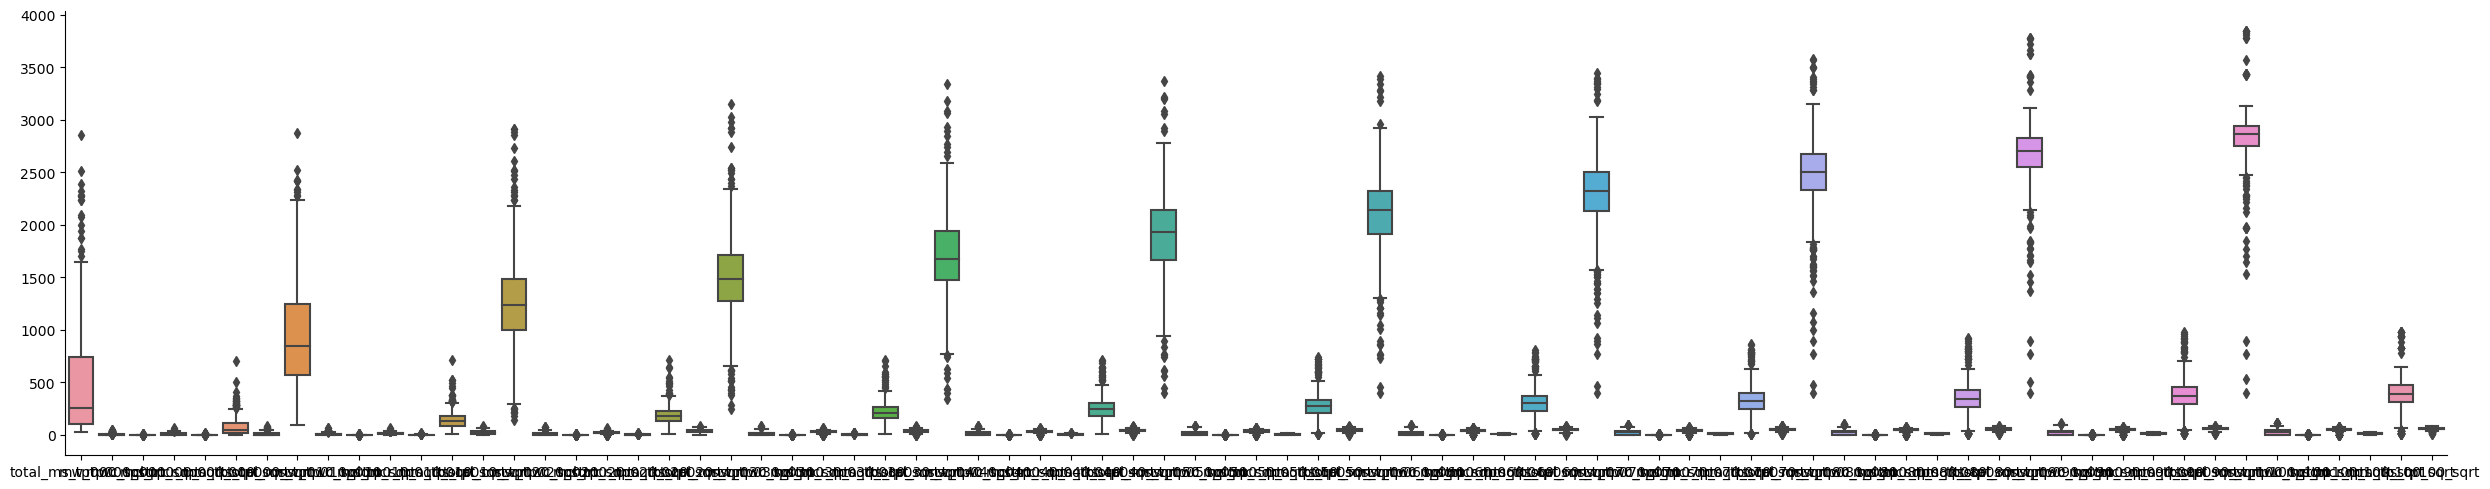

In [64]:
sns.catplot(data = s2_df.loc[:, num_vars], kind='box', aspect=5)

plt.show()

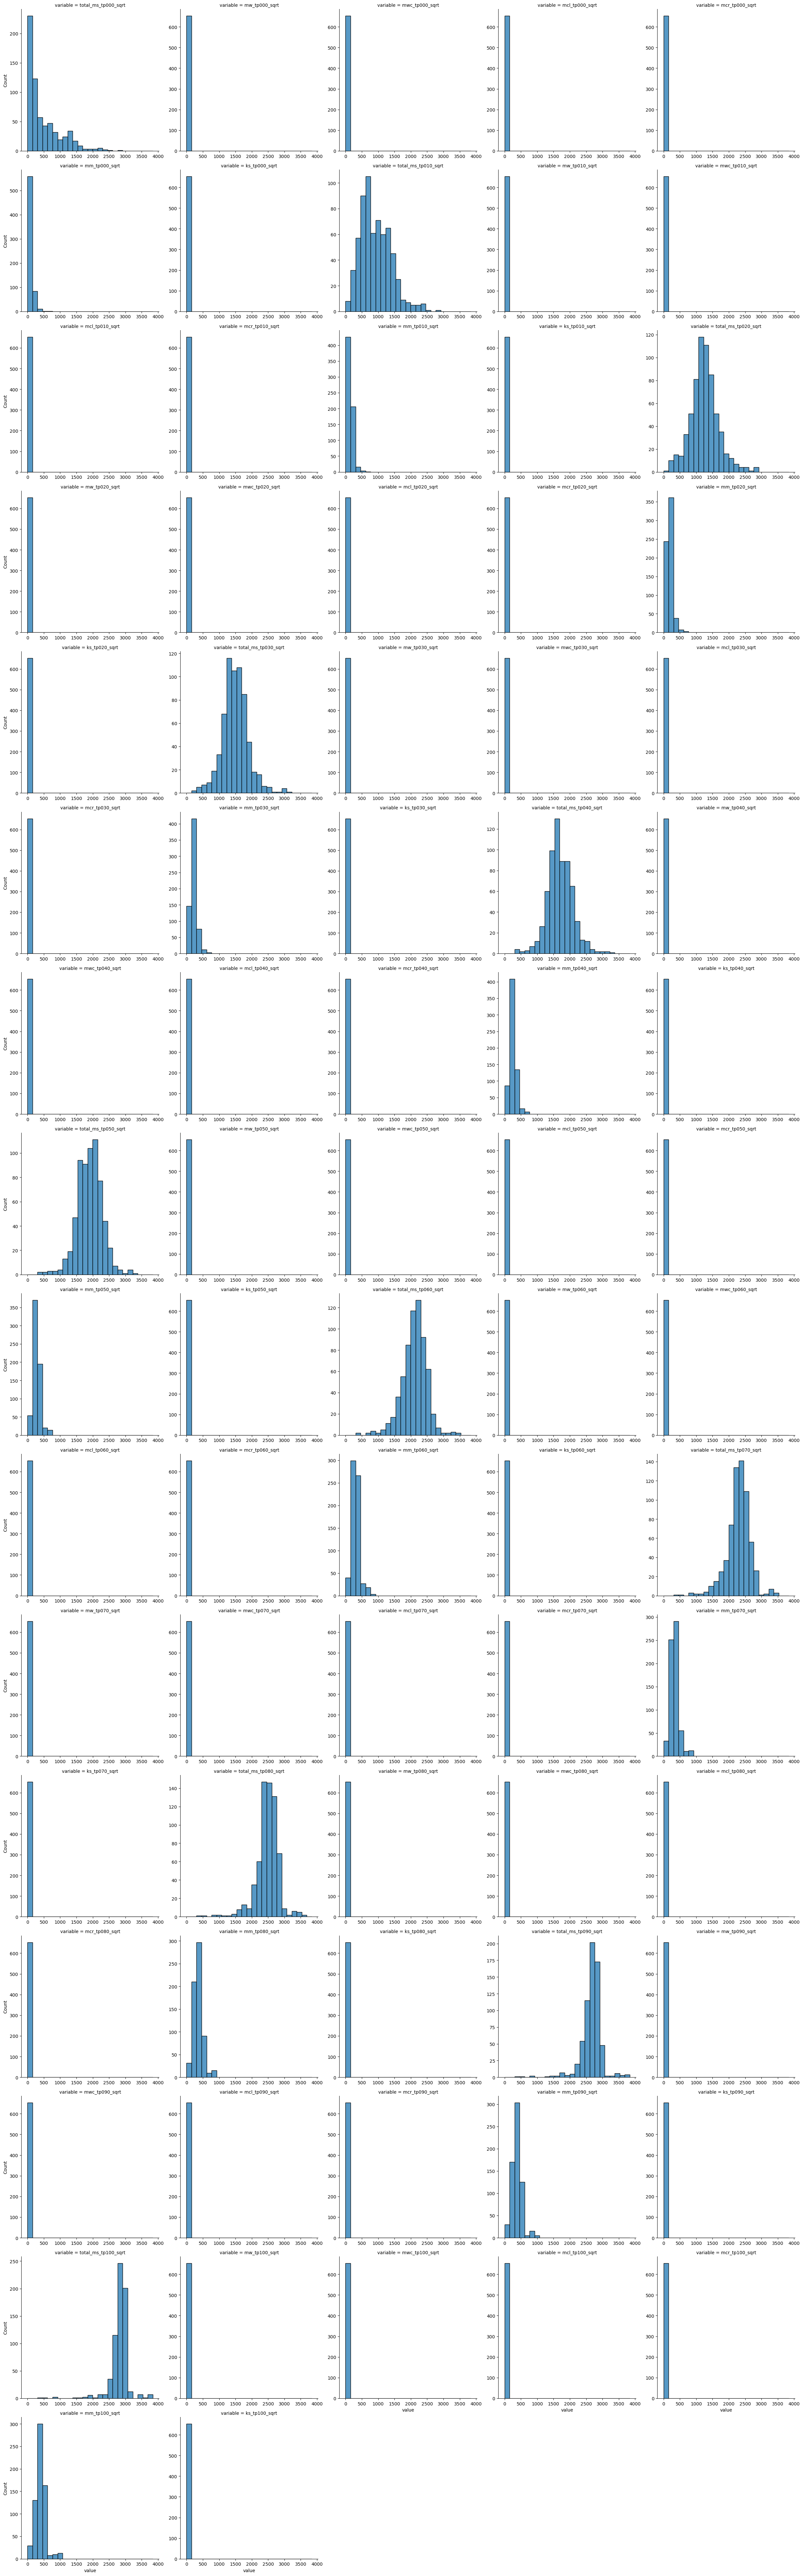

In [65]:
sns.displot(data = s2_df.loc[:, ['sid'] + num_vars].melt(id_vars='sid'),
            x='value', col='variable', kind='hist', bins=25,
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=5)

plt.show()

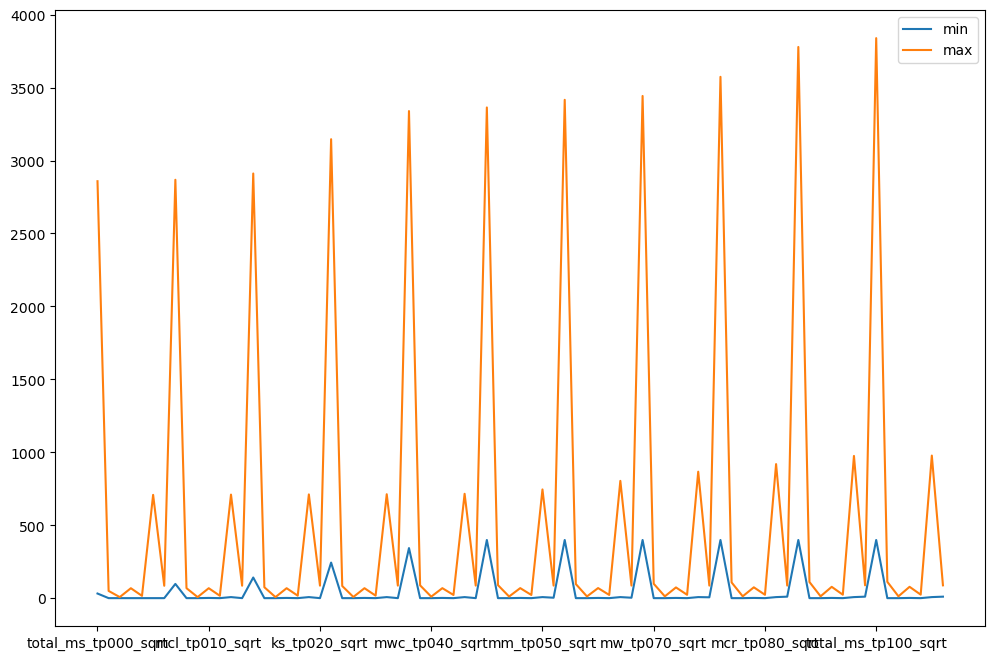

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

s2_df.loc[:, num_vars].describe().loc[['min', 'max'], :].T.plot(ax=ax)

plt.show()

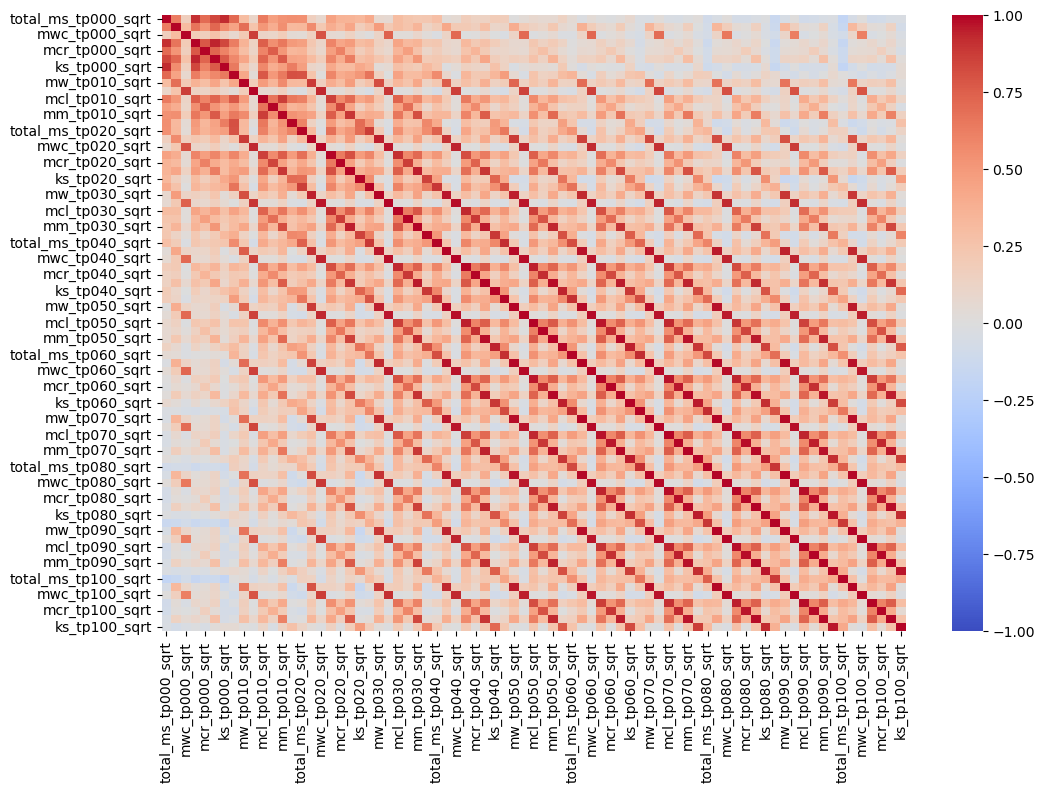

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = s2_df.loc[:, num_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

##### Session 3

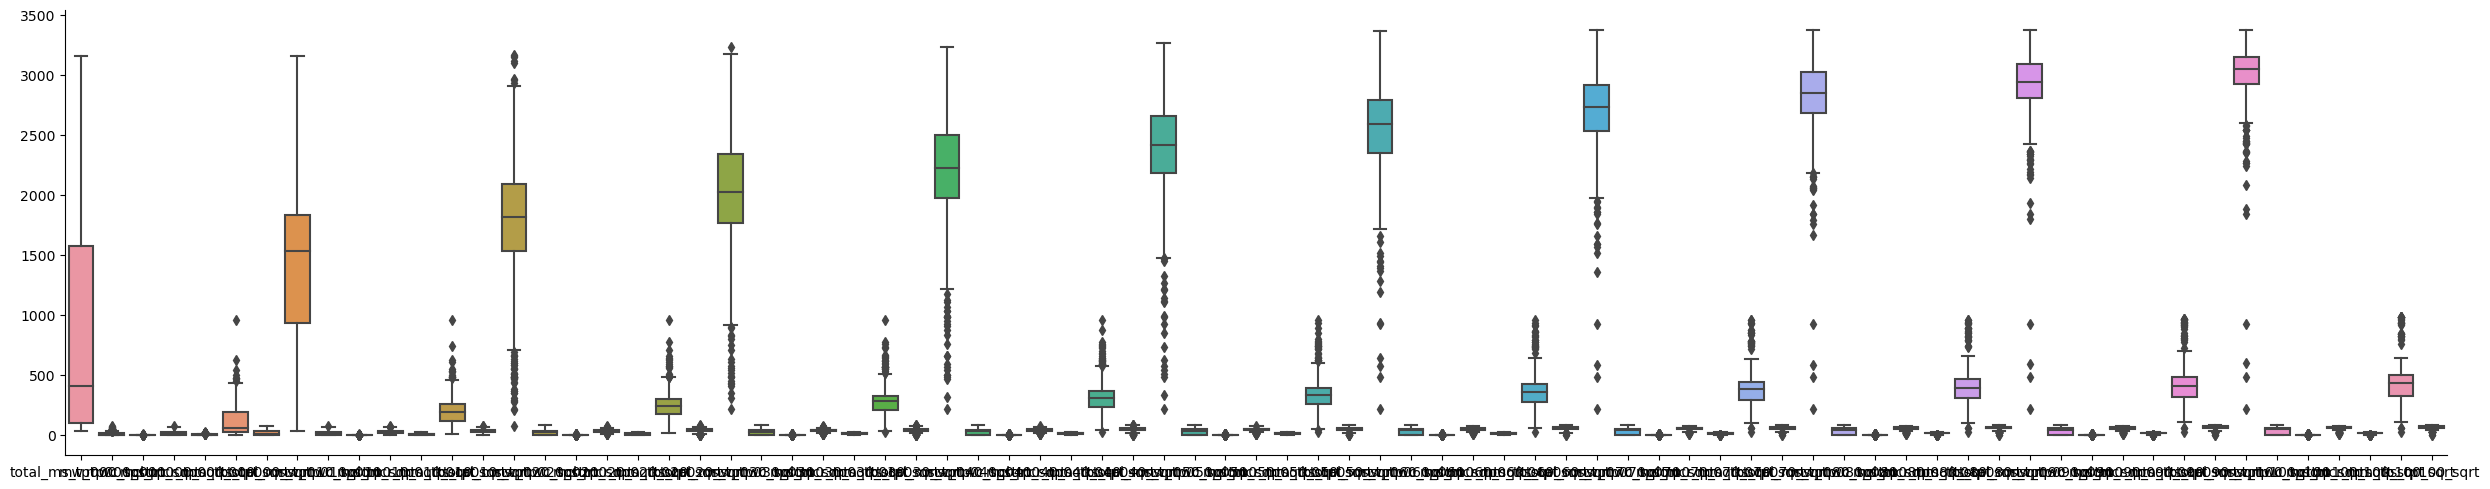

In [68]:
sns.catplot(data = s3_df.loc[:, num_vars], kind='box', aspect=5)

plt.show()

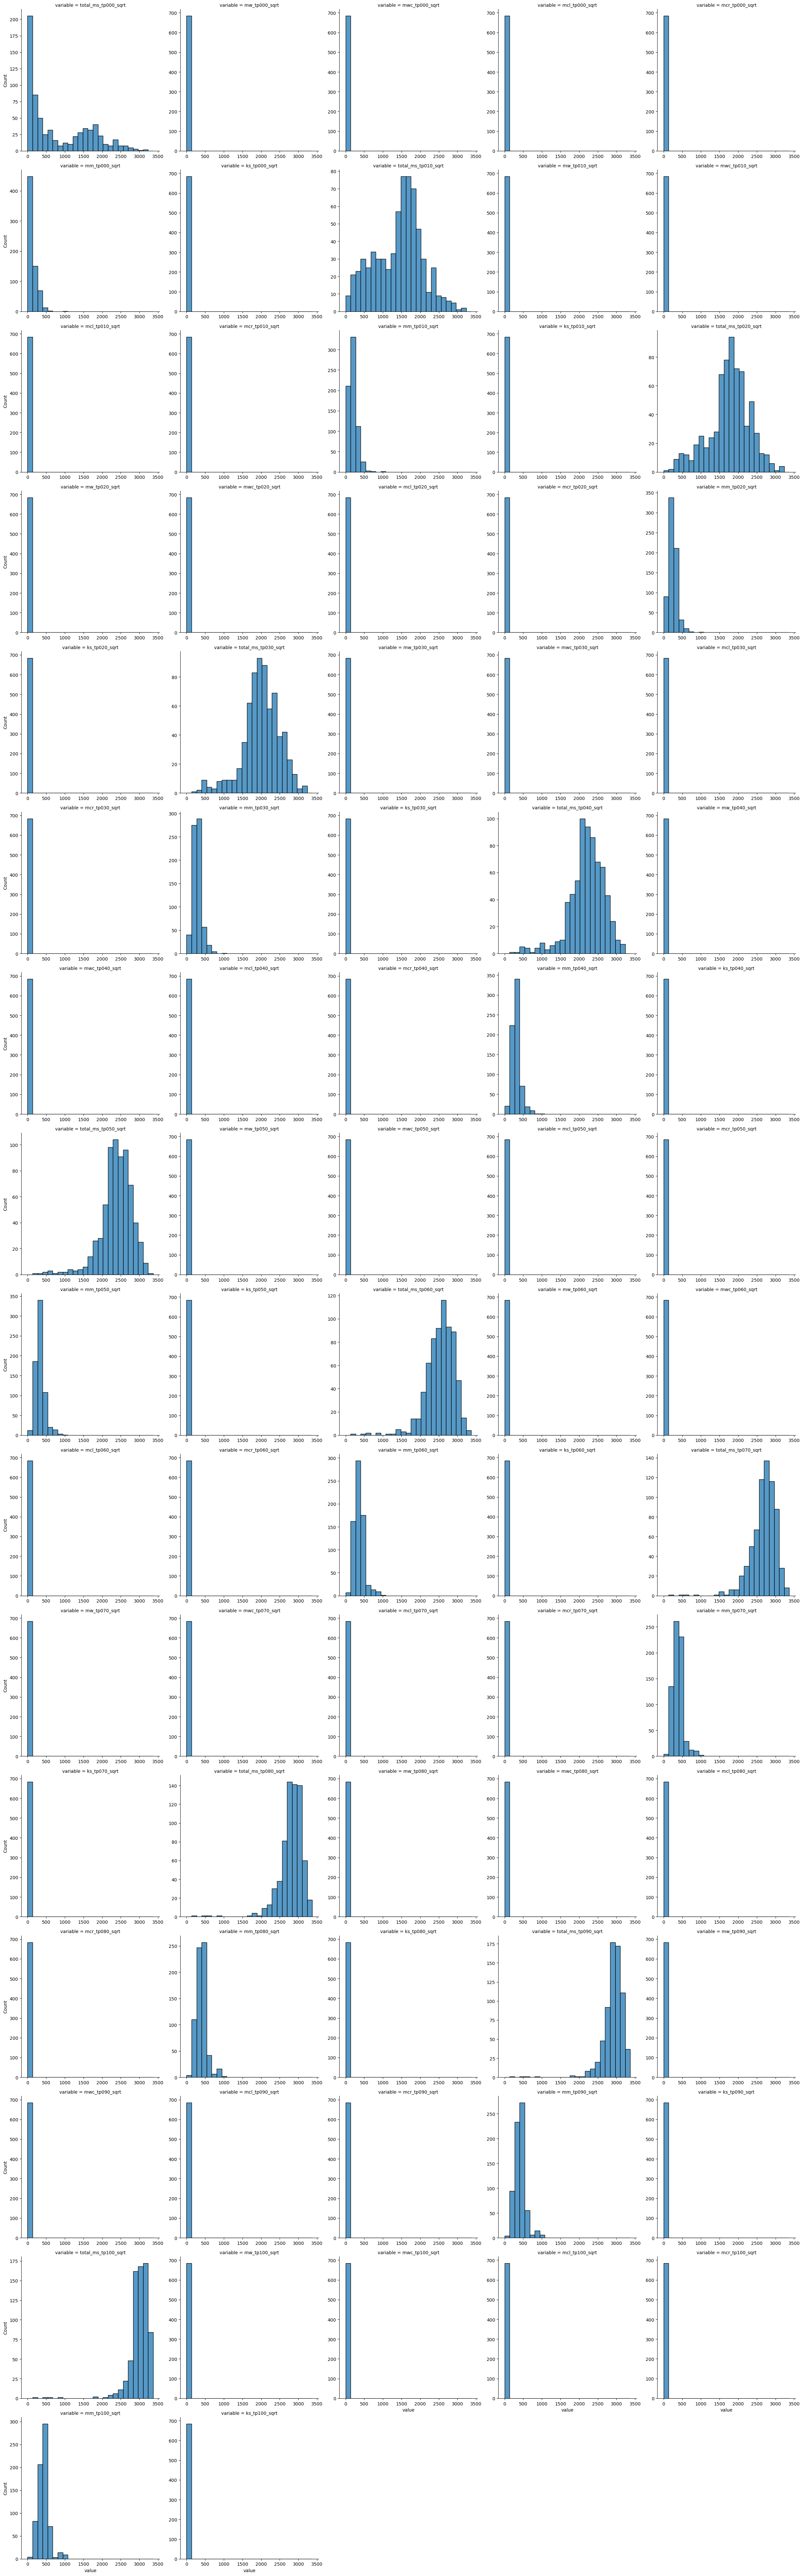

In [69]:
sns.displot(data = s3_df.loc[:, ['sid'] + num_vars].melt(id_vars='sid'),
            x='value', col='variable', kind='hist', bins=25, 
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=5)

plt.show()

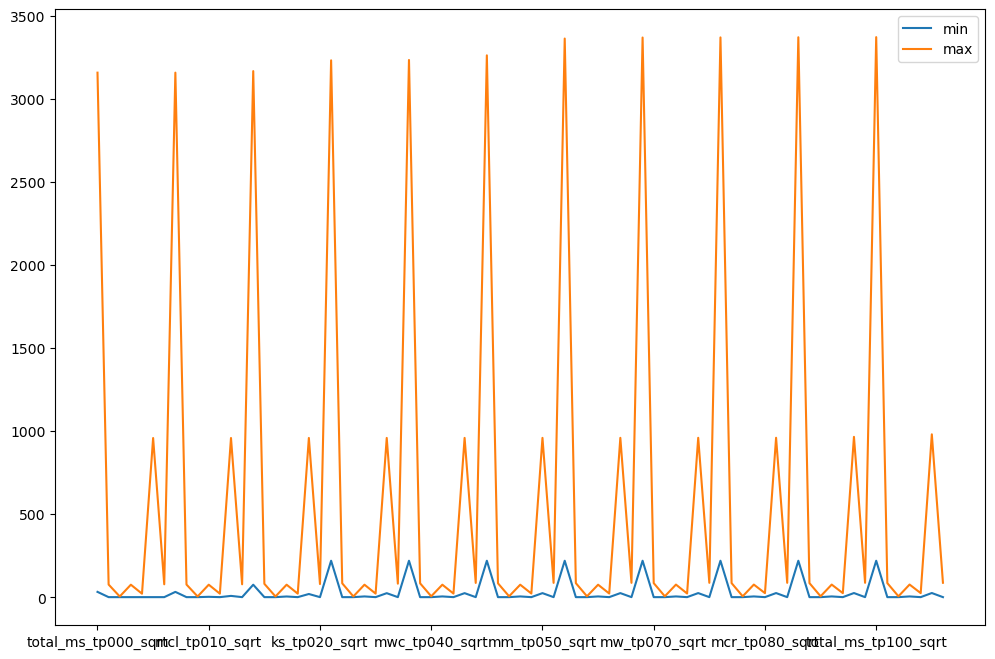

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))

s3_df.loc[:, num_vars].describe().loc[['min', 'max'], :].T.plot(ax=ax)

plt.show()

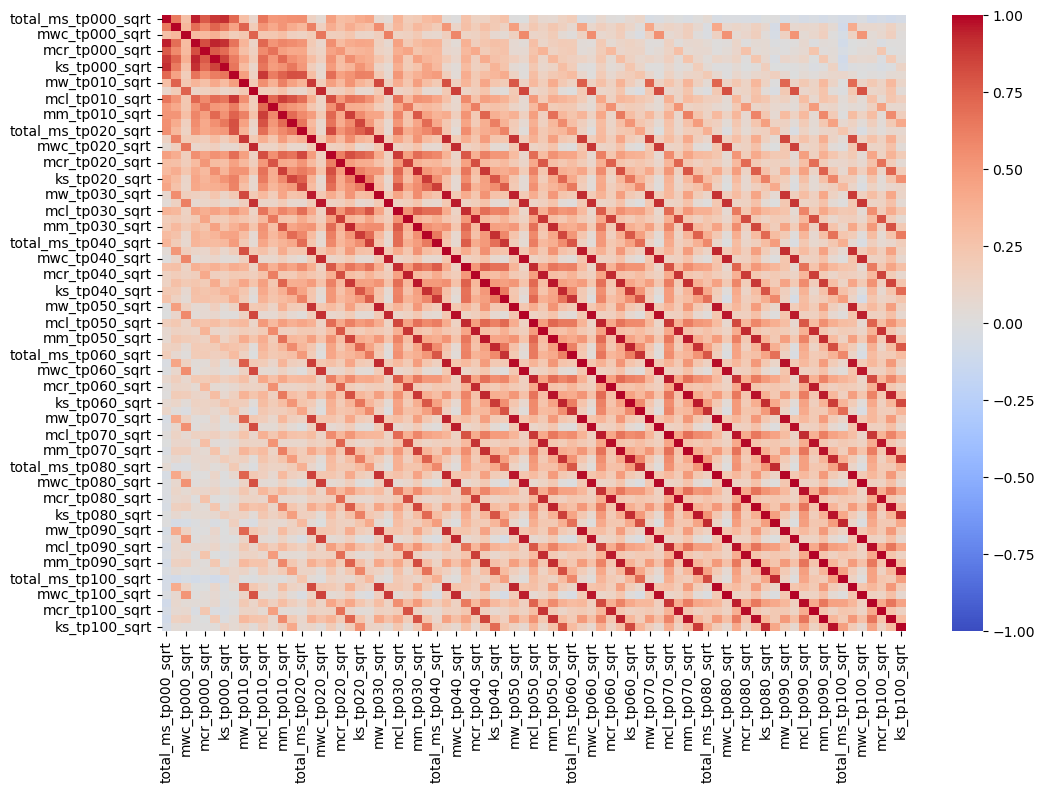

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = s3_df.loc[:, num_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

##### Session 4

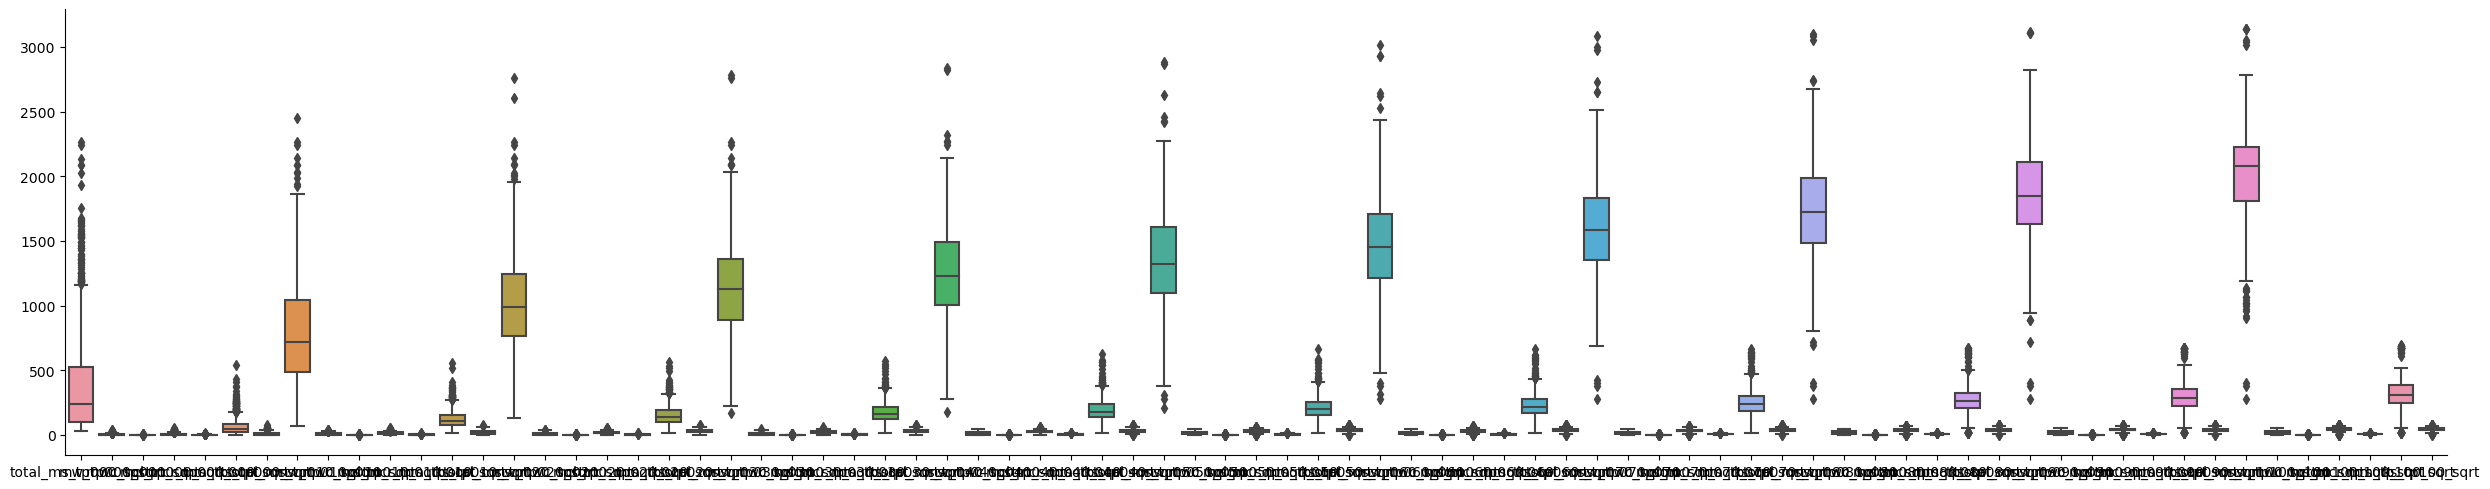

In [72]:
sns.catplot(data = s4_df.loc[:, num_vars], kind='box', aspect=5)

plt.show()

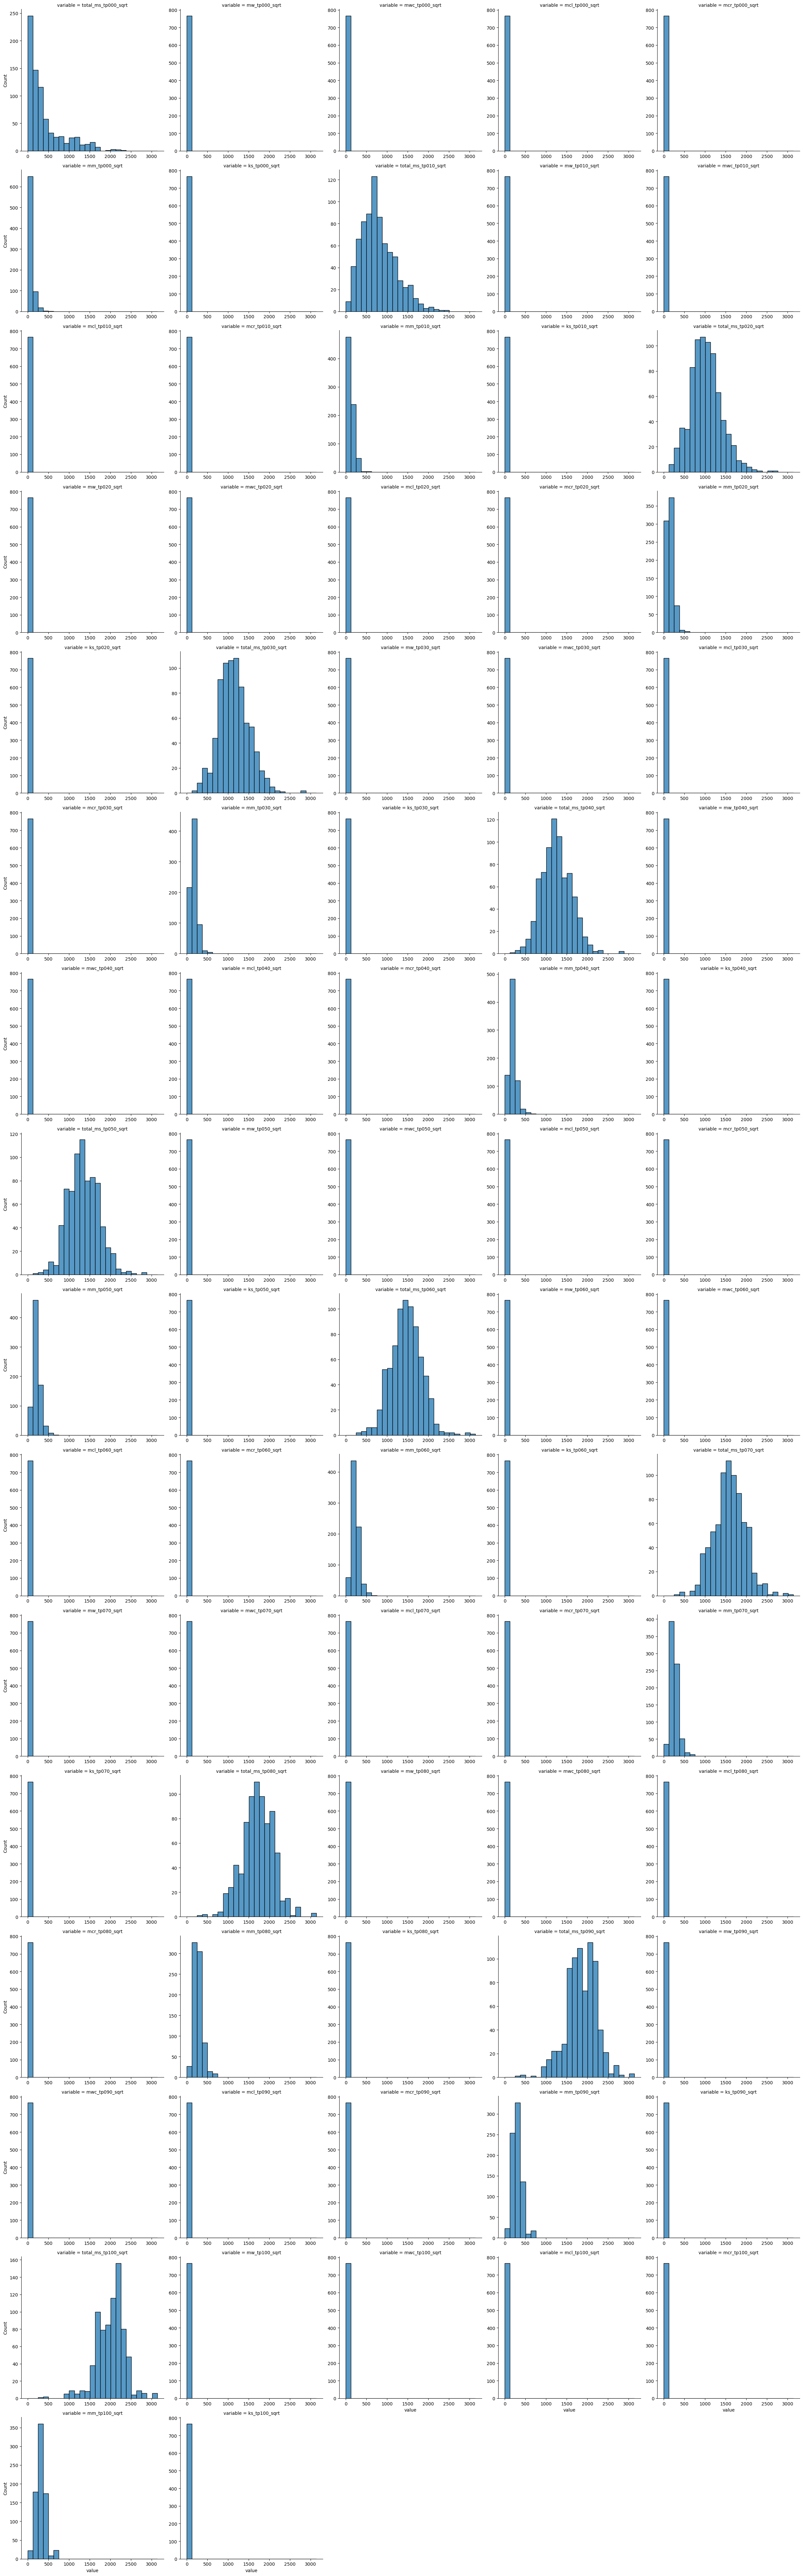

In [73]:
sns.displot(data = s4_df.loc[:, ['sid'] + num_vars].melt(id_vars='sid'),
            x='value', col='variable', kind='hist', bins=25,
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=5)

plt.show()

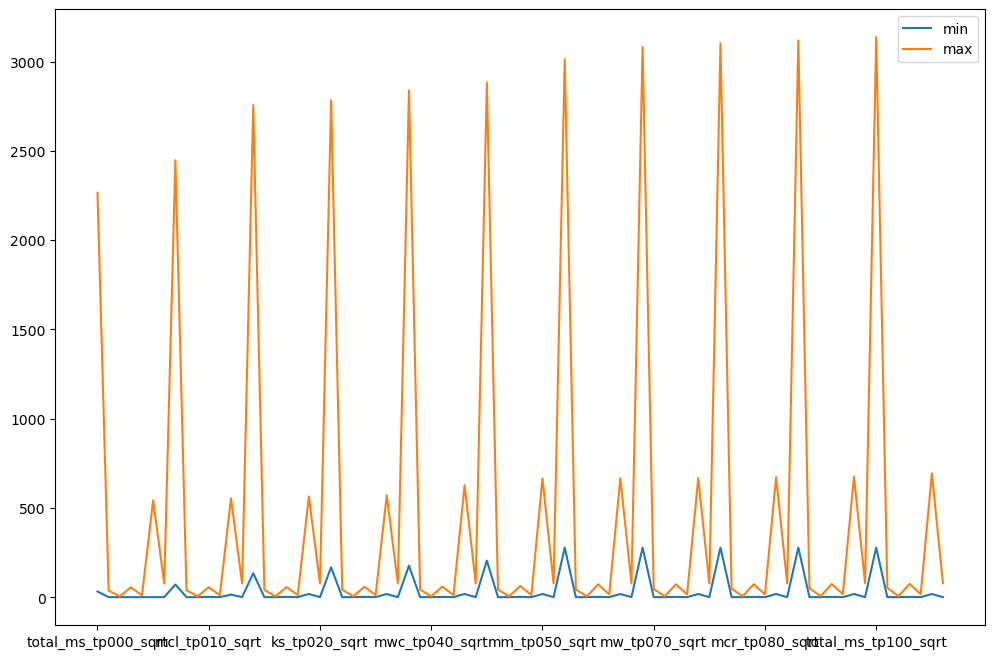

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

s4_df.loc[:, num_vars].describe().loc[['min', 'max'], :].T.plot(ax=ax)

plt.show()

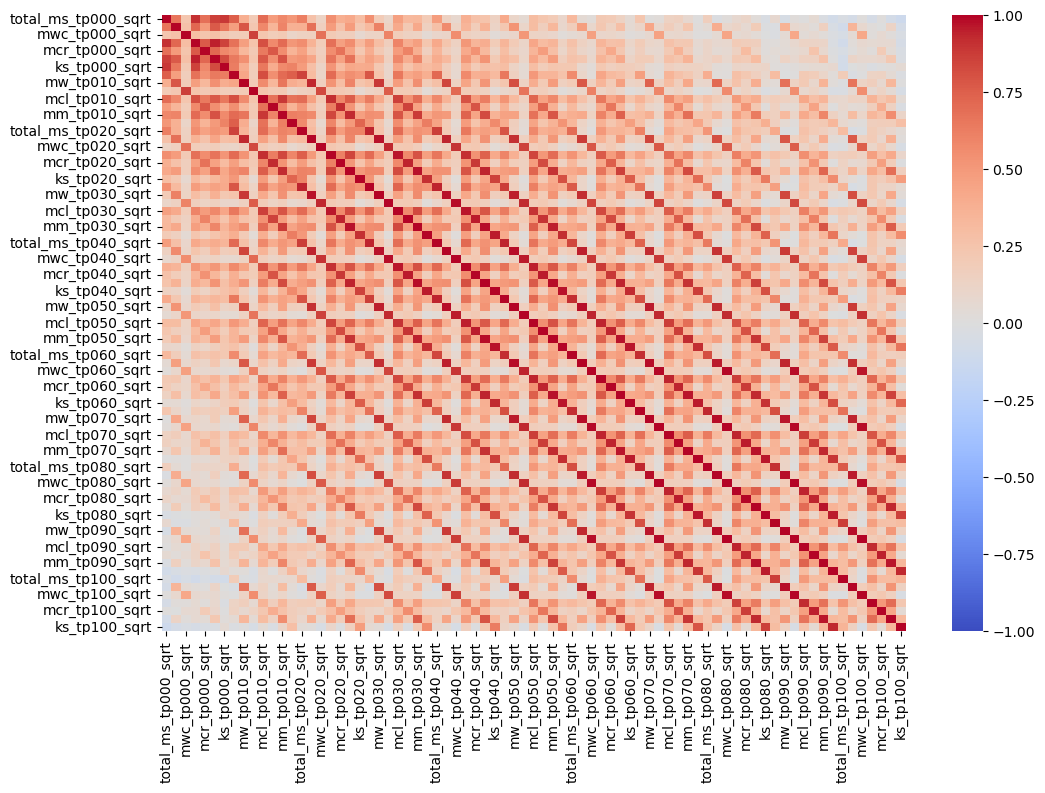

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = s4_df.loc[:, num_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

##### Session 5

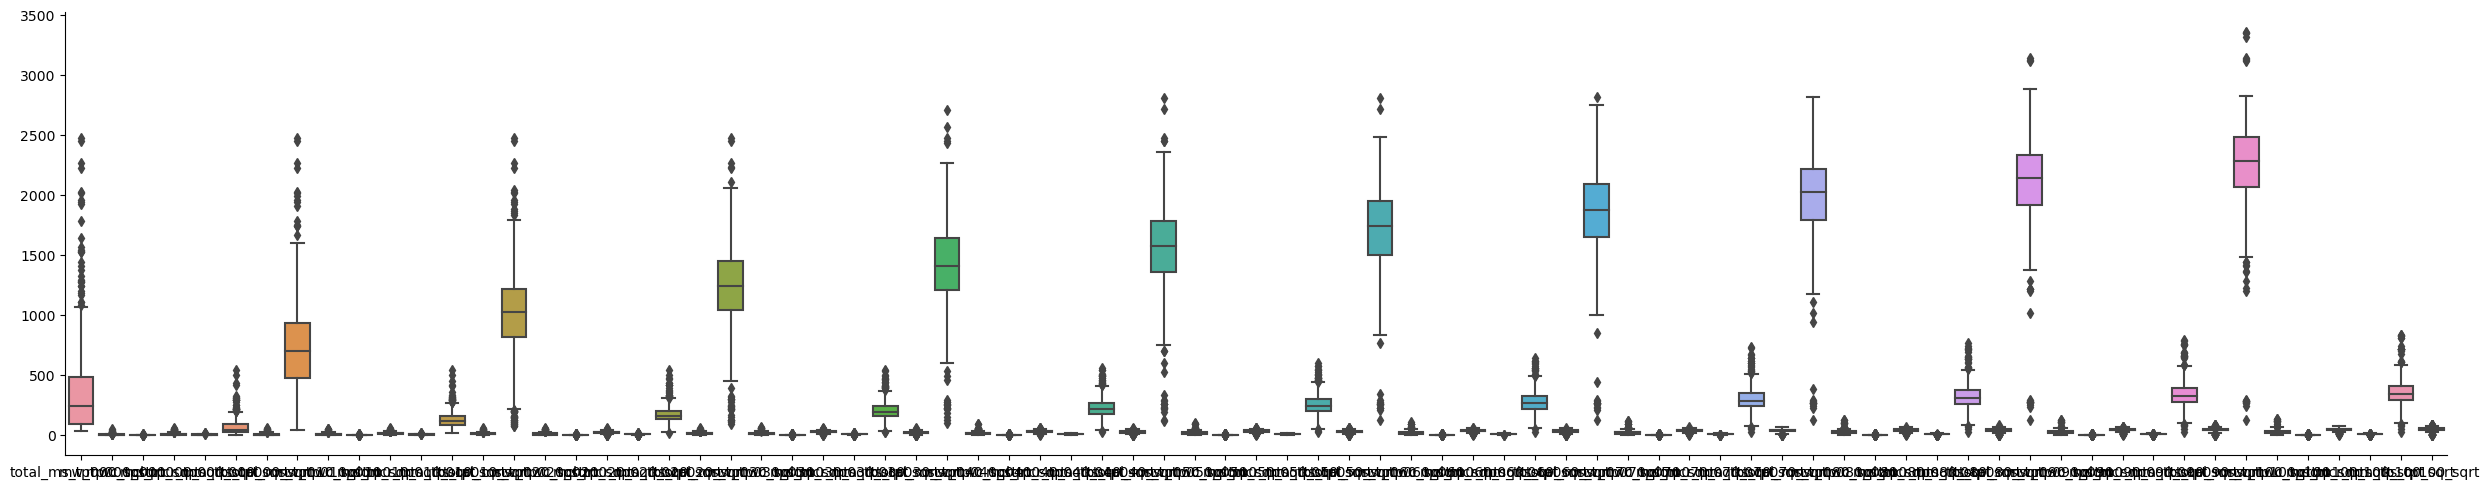

In [76]:
sns.catplot(data = s5_df.loc[:, num_vars], kind='box', aspect=5)

plt.show()

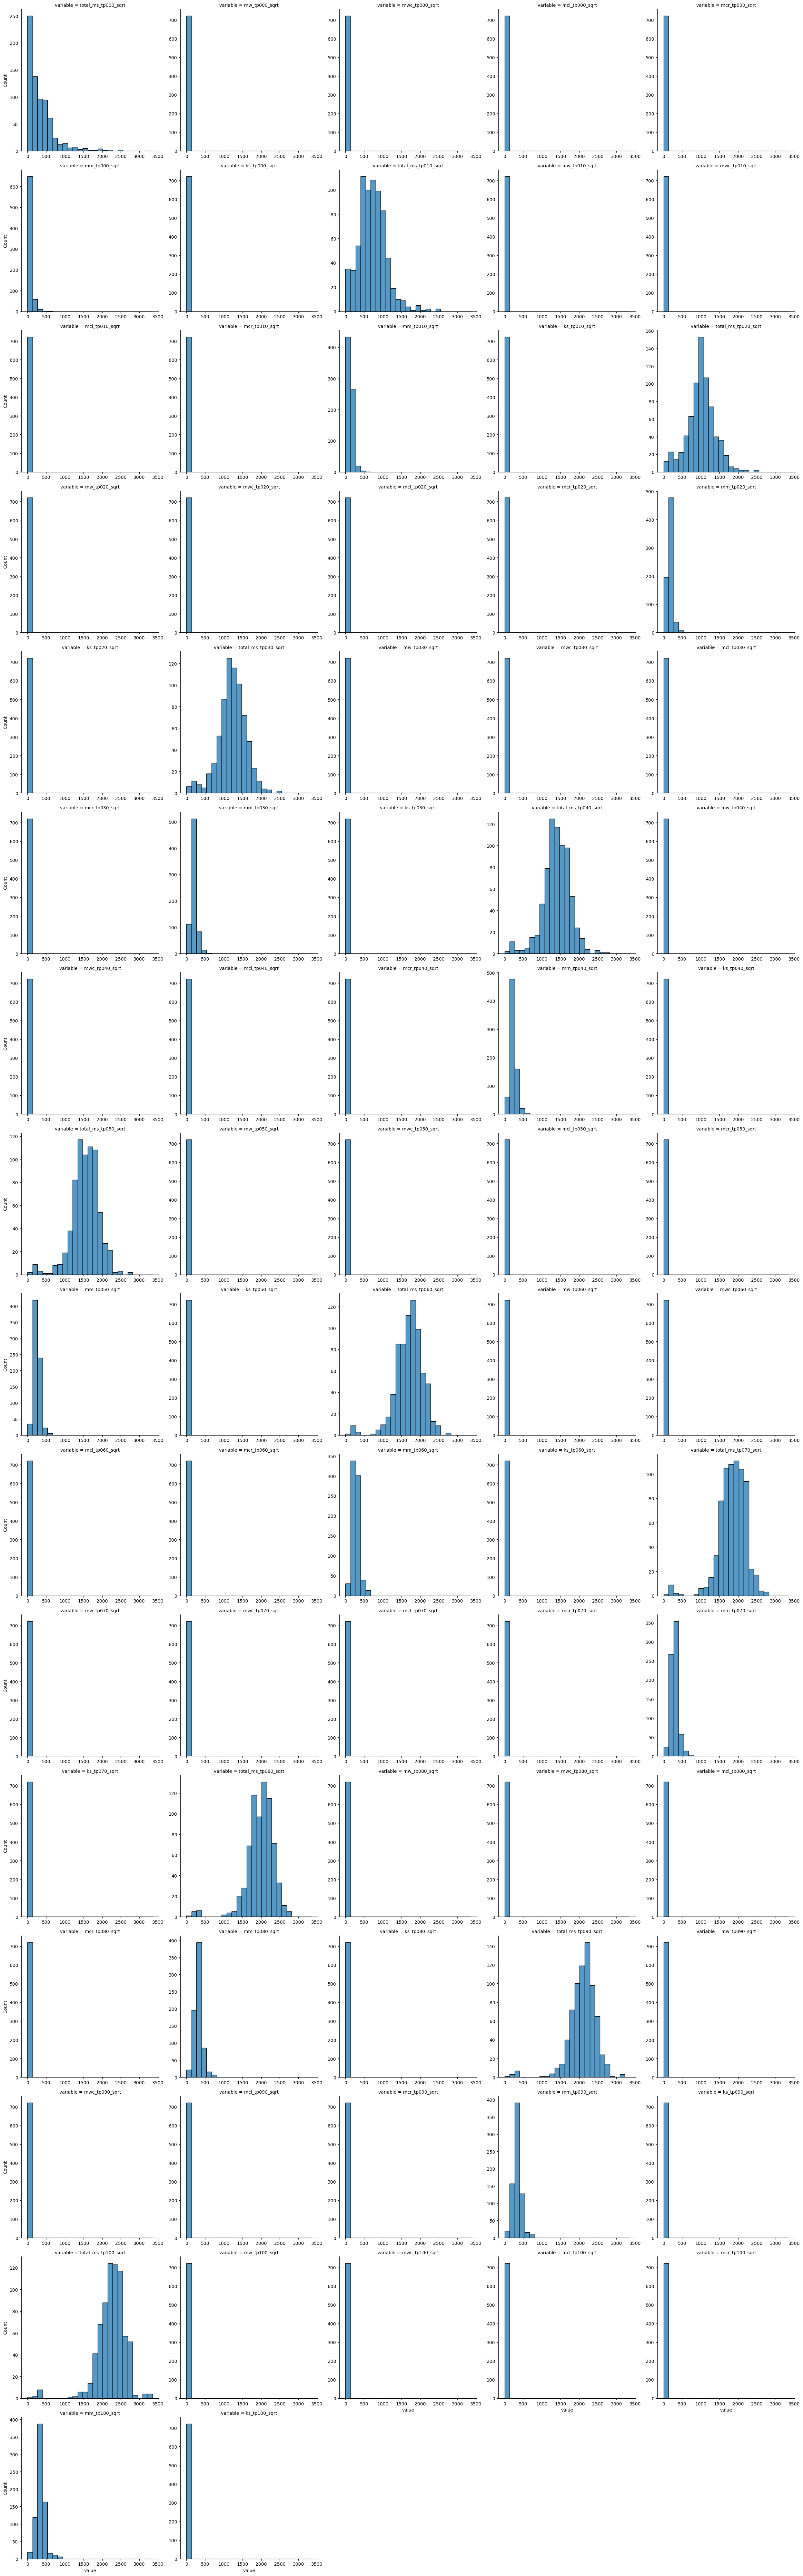

In [77]:
sns.displot(data = s5_df.loc[:, ['sid'] + num_vars].melt(id_vars='sid'),
            x='value', col='variable', kind='hist', bins=25,
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=5)

plt.show()

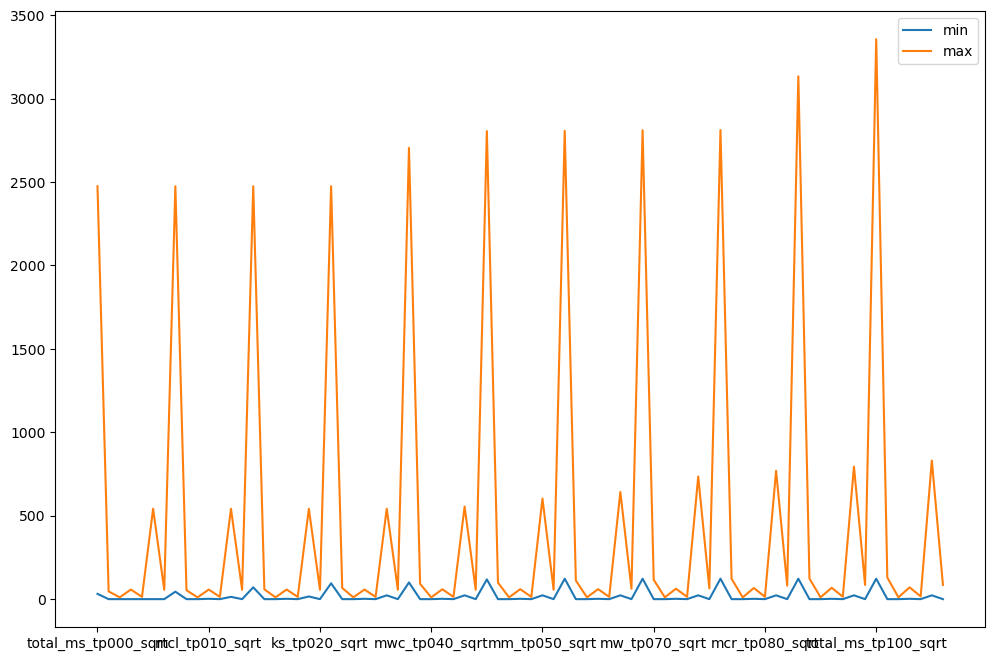

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))

s5_df.loc[:, num_vars].describe().loc[['min', 'max'], :].T.plot(ax=ax)

plt.show()

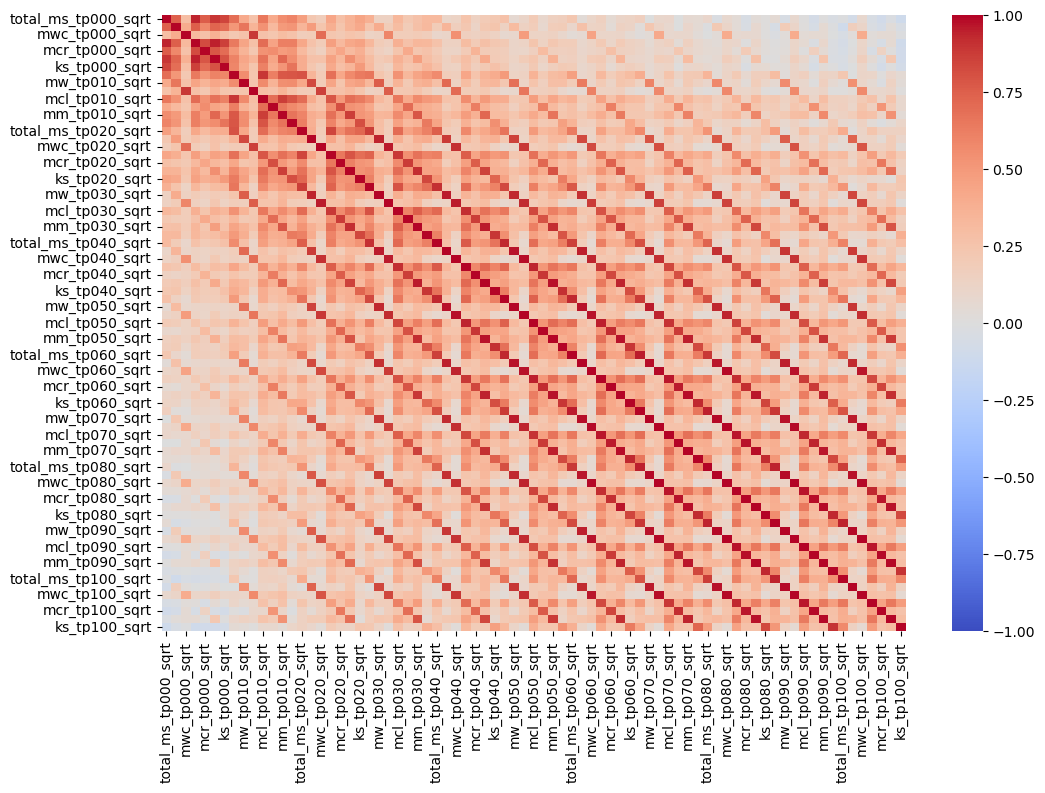

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = s5_df.loc[:, num_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

##### Session 6

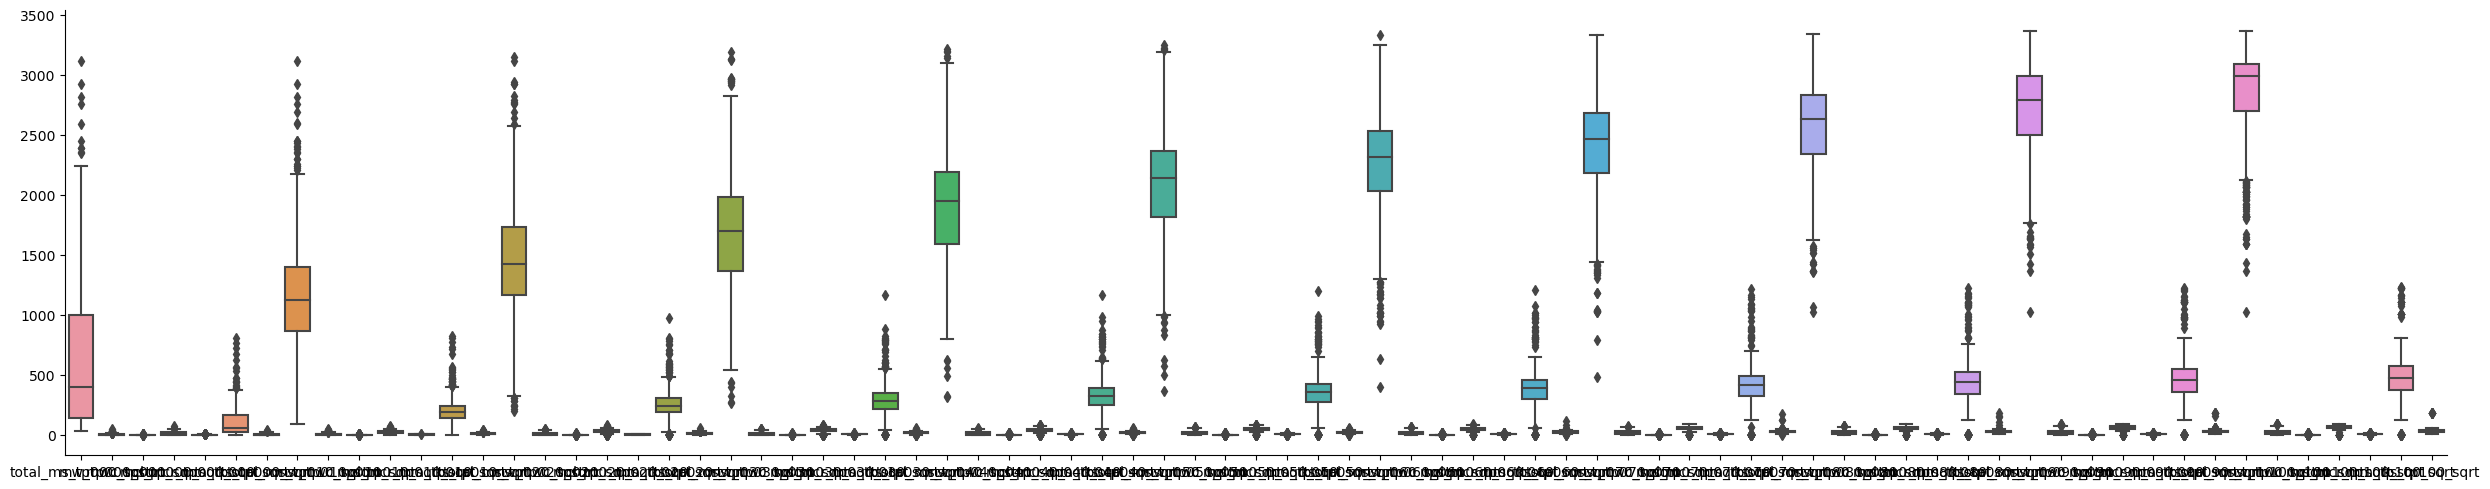

In [80]:
sns.catplot(data = s6_df.loc[:, num_vars], kind='box', aspect=5)

plt.show()

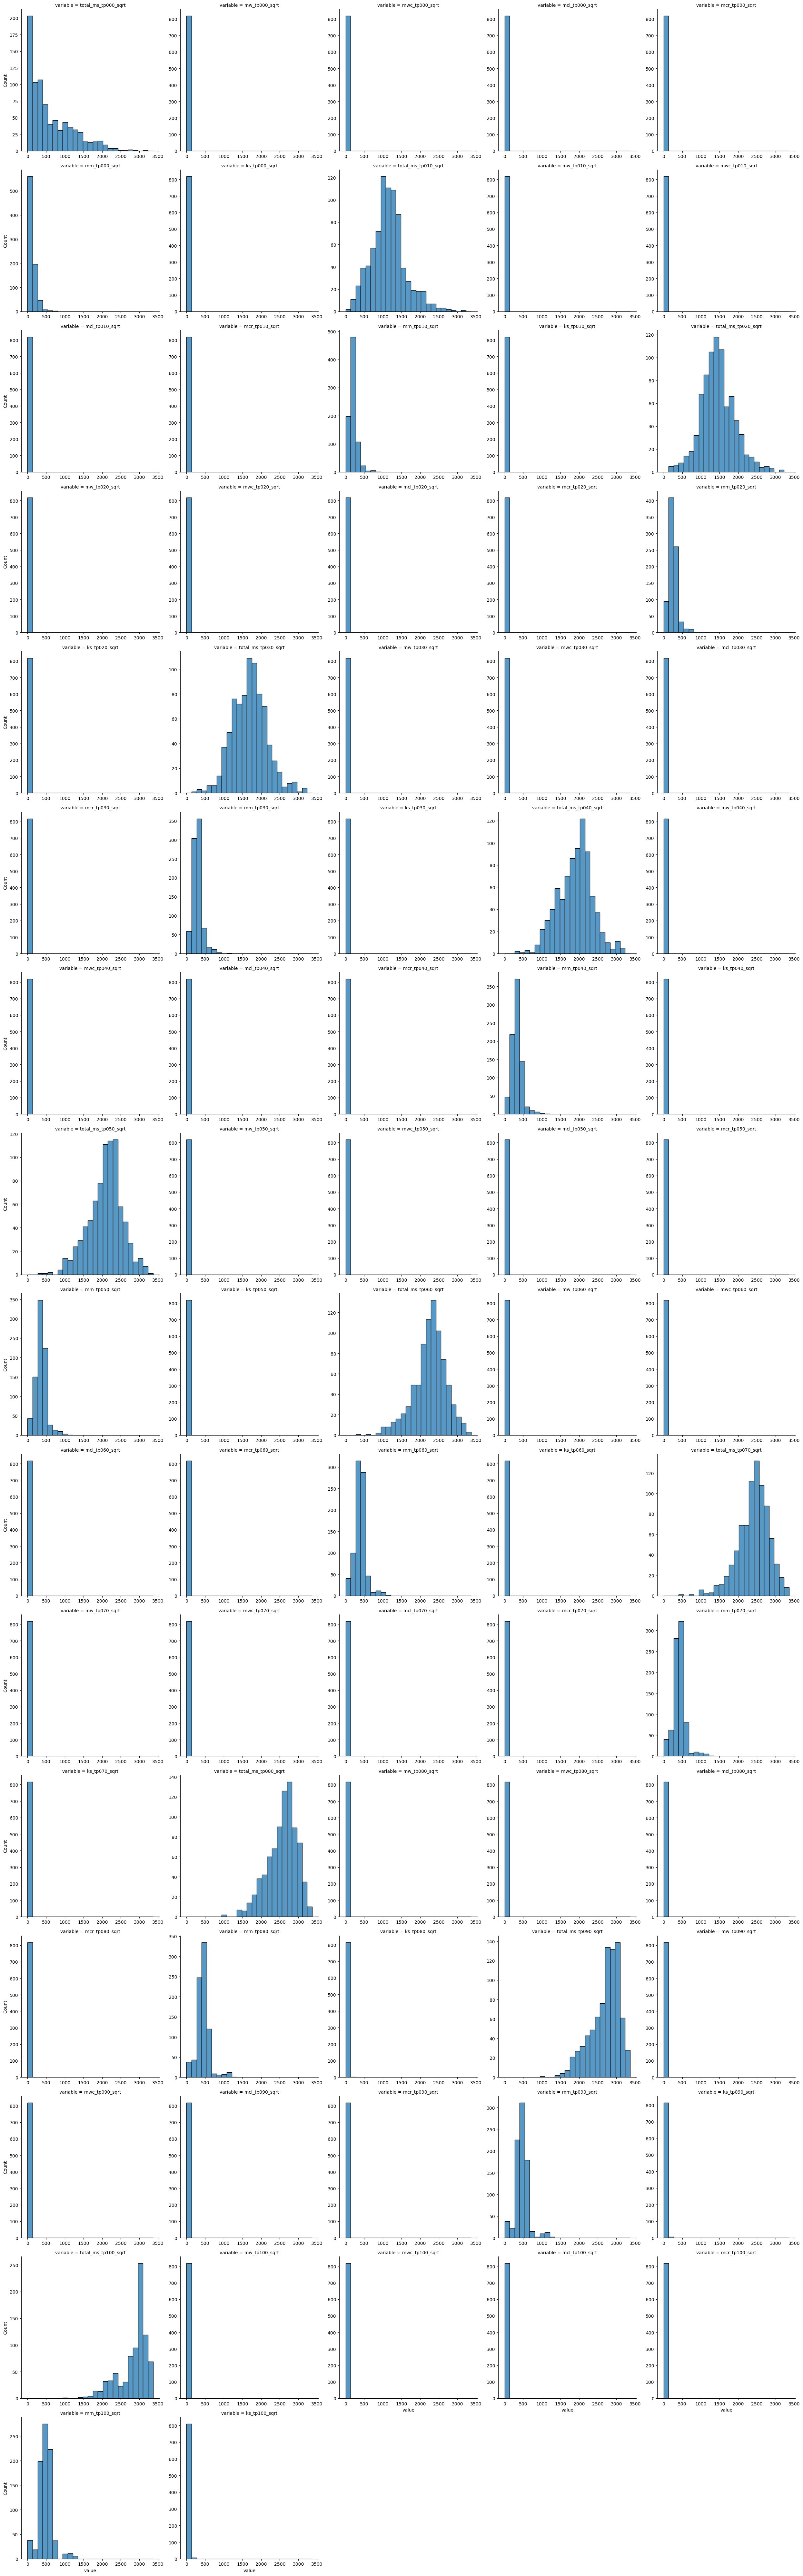

In [81]:
sns.displot(data = s6_df.loc[:, ['sid'] + num_vars].melt(id_vars='sid'),
            x='value', col='variable', kind='hist', bins=25,
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=5)

plt.show()

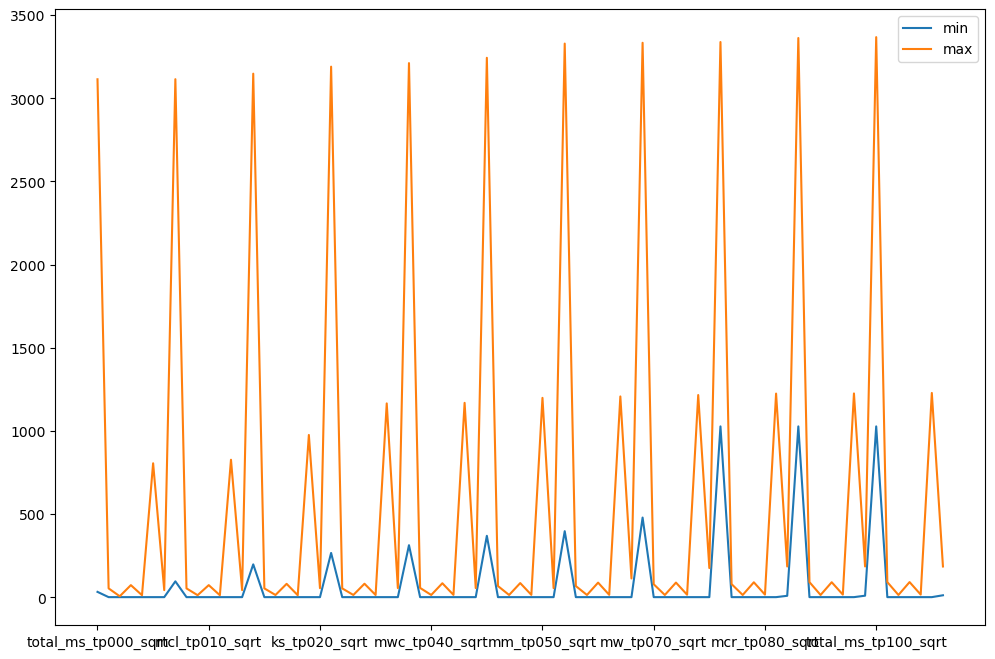

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))

s6_df.loc[:, num_vars].describe().loc[['min', 'max'], :].T.plot(ax=ax)

plt.show()

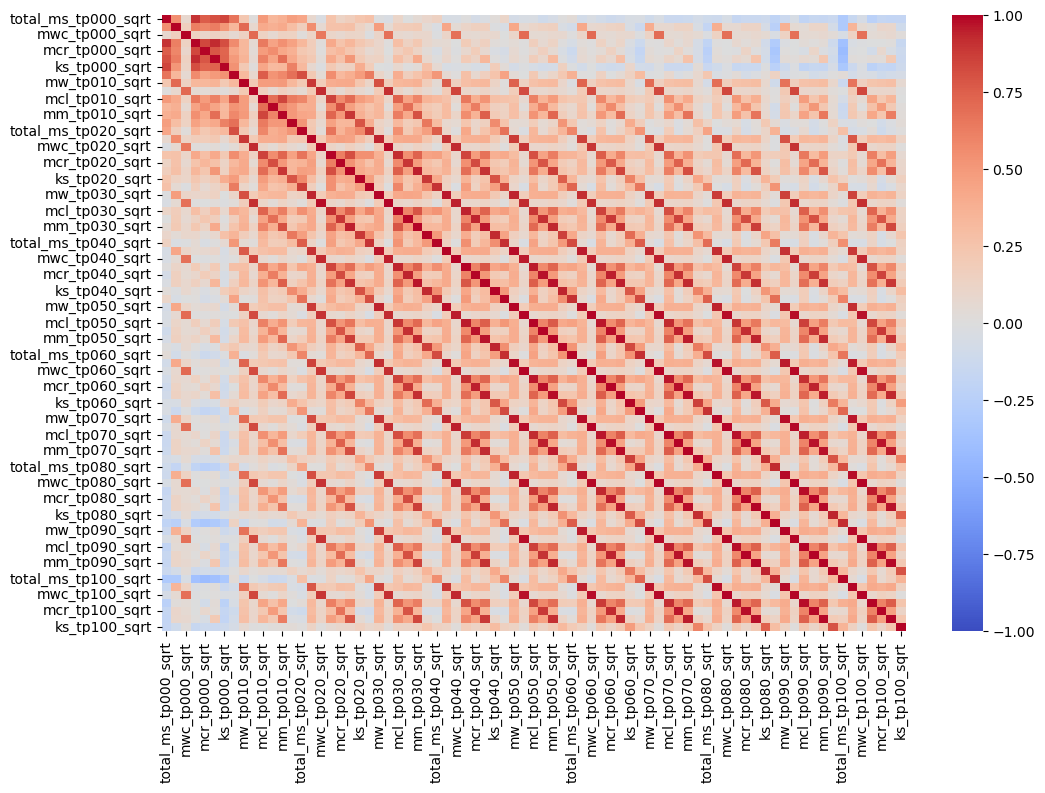

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = s6_df.loc[:, num_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

### Preprocessing with Pipelines

##### Categorical and continuous reprocessors and pipelines for additive model with pairwise interaction between continuous variables

The number of features between the formula interface model and the Pipelines model differs by 1 because of the intercept column of ones in the formula interface model.

In [84]:
categorical_inputs = ['actv_grp']

In [85]:
categorical_transform = Pipeline( steps = [ ('dummy', OneHotEncoder(drop='first')) ] )

In [86]:
numeric_transform_pairs = Pipeline( steps=[('std_input', StandardScaler()),
                                        ('make_poly', PolynomialFeatures(degree=2, interaction_only = True, include_bias=False))])

In [87]:
pair_transform = ColumnTransformer( transformers=[('num', numeric_transform_pairs, num_vars),
                                                    ('cat', categorical_transform, categorical_inputs)])

In [88]:
pair_transform.fit_transform( s2_df ).shape

(653, 3012)

In [89]:
sk_s2_list[9][1].shape

(653, 3013)

#### Pipelines with PCA

In [90]:
s2_df

sess  sid    actv_grp  total_ms_tp000_sqrt  mw_tp000_sqrt  \
606     2    1     Aulaweb          1236.122971      16.643317   
607     2    1       Blank           216.794834       2.645751   
608     2    1       Deeds            70.710678       0.000000   
609     2    1     Diagram           604.979338       4.472136   
610     2    1       Other           771.362431       4.472136   
...   ...  ...         ...                  ...            ...   
1254    2  104     Diagram           412.310563       3.464102   
1255    2  104       Other           134.164079       1.732051   
1256    2  104  Properties           800.000000      12.206556   
1257    2  104       Study           404.969135       3.464102   
1258    2  104  TextEditor           141.421356       2.449490   

      mwc_tp000_sqrt  mcl_tp000_sqrt  mcr_tp000_sqrt  mm_tp000_sqrt  \
606              0.0       25.278449        1.414214     224.784341   
607              0.0        4.582576        0.000000      46.808119   
608              0.0        2.449490        0.000000      21.260292   
609              0.0       14.832397        0.000000     117.085439   
610              0.0       16.852300        0.000000     151.650915   
...              ...             ...             ...            ...   
1254             0.0       11.747340        0.000000      74.959989   
1255             0.0        1.414214        0.000000      23.151674   
1256             0.0       18.000000        2.000000     151.367103   
1257             0.0       11.401754        0.000000      71.798329   
1258             0.0        2.000000        0.000000      25.219040   

      ks_tp000_sqrt  ...  mm_tp090_sqrt  ks_tp090_sqrt  total_ms_tp100_sqrt  \
606       37.496667  ...     486.501593      51.314715          2760.796986   
607        2.828427  ...     494.317509      52.801515          2930.699575   
608        0.000000  ...     501.163047      54.166410          2928.310093   
609       14.352700  ...     525.389950      54.896266          2927.968579   
610       14.352700  ...     521.050669      54.721111          2933.087111   
...             ...  ...            ...            ...                  ...   
1254      15.874508  ...     381.201522      59.841457          2703.146315   
1255       0.000000  ...     417.693309      64.023433          2738.795356   
1256      27.294688  ...     247.365721      36.573214          2688.308018   
1257      15.874508  ...     384.790852      59.874870          2712.747685   
1258       0.000000  ...     414.130414      63.929649          2733.130074   

      mw_tp100_sqrt  mwc_tp100_sqrt  mcl_tp100_sqrt  mcr_tp100_sqrt  \
606       37.775654             0.0       61.212744       16.309506   
607       38.483763             0.0       65.069194       17.720045   
608       38.470768             0.0       64.992307       17.720045   
609       38.470768             0.0       64.946132       17.720045   
610       38.483763             0.0       65.306967       17.720045   
...             ...             ...             ...             ...   
1254      24.839485             0.0       55.587768        7.615773   
1255      29.478806             0.0       56.480085        7.745967   
1256      24.062419             0.0       54.808758        7.615773   
1257      25.592968             0.0       55.677644        7.615773   
1258      29.478806             0.0       56.409219        7.615773   

      mm_tp100_sqrt  ks_tp100_sqrt  interim_scr  
606      520.037499      54.387499          5.0  
607      550.932845      57.113921          5.0  
608      550.207234      56.920998          5.0  
609      549.960908      56.920998          5.0  
610      552.080610      57.410800          5.0  
...             ...            ...          ...  
1254     412.372405      63.929649          6.0  
1255     419.435335      64.474801          6.0  
1256     407.839429      63.545259          6.0  
1257     413.134361      63.929649          6.0  
1258   

In [91]:
x_num_only = s2_df.loc[:, num_vars].copy()

In [92]:
x_num_only.isna().sum()

total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
mwc_tp000_sqrt         0
mcl_tp000_sqrt         0
mcr_tp000_sqrt         0
                      ..
mwc_tp100_sqrt         0
mcl_tp100_sqrt         0
mcr_tp100_sqrt         0
mm_tp100_sqrt          0
ks_tp100_sqrt          0
Length: 77, dtype: int64

In [93]:
youtput = s2_df.loc[:, ['interim_scr']].copy()

In [94]:
numeric_transform_std = Pipeline( steps = [ ('std_input', StandardScaler()) ])

In [95]:
X_train_num_only = x_num_only.to_numpy()

In [96]:
y_train = youtput.interim_scr.to_numpy().ravel()

In [97]:
my_cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [98]:
enet_default = ElasticNet(random_state=101, max_iter=100001,
                                  alpha=1.0, l1_ratio=0.5)

In [99]:
x_num_only.columns

Index(['total_ms_tp000_sqrt', 'mw_tp000_sqrt', 'mwc_tp000_sqrt',
       'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt', 'ks_tp000_sqrt',
       'total_ms_tp010_sqrt', 'mw_tp010_sqrt', 'mwc_tp010_sqrt',
       'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt', 'ks_tp010_sqrt',
       'total_ms_tp020_sqrt', 'mw_tp020_sqrt', 'mwc_tp020_sqrt',
       'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt', 'ks_tp020_sqrt',
       'total_ms_tp030_sqrt', 'mw_tp030_sqrt', 'mwc_tp030_sqrt',
       'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt', 'ks_tp030_sqrt',
       'total_ms_tp040_sqrt', 'mw_tp040_sqrt', 'mwc_tp040_sqrt',
       'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt', 'ks_tp040_sqrt',
       'total_ms_tp050_sqrt', 'mw_tp050_sqrt', 'mwc_tp050_sqrt',
       'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt', 'ks_tp050_sqrt',
       'total_ms_tp060_sqrt', 'mw_tp060_sqrt', 'mwc_tp060_sqrt',
       'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt', 'ks_tp060_sqrt',
      

In [100]:
x_num_only_ready = StandardScaler().fit_transform( x_num_only )

In [101]:
pca_object = PCA().fit(x_num_only_ready)

In [102]:
pc_scores = pca_object.transform( x_num_only_ready )

##### PCA Correlation

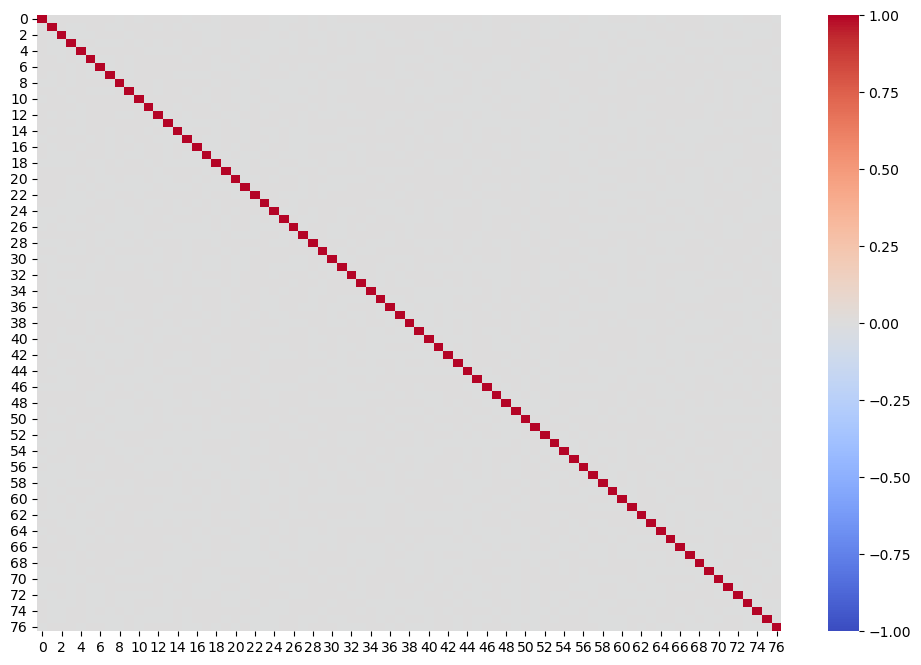

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(pd.DataFrame(pc_scores).corr(),
           vmin=-1, vmax=1, center=0,
           cmap='coolwarm', 
           ax=ax)

plt.show()

##### PCA Scree plot

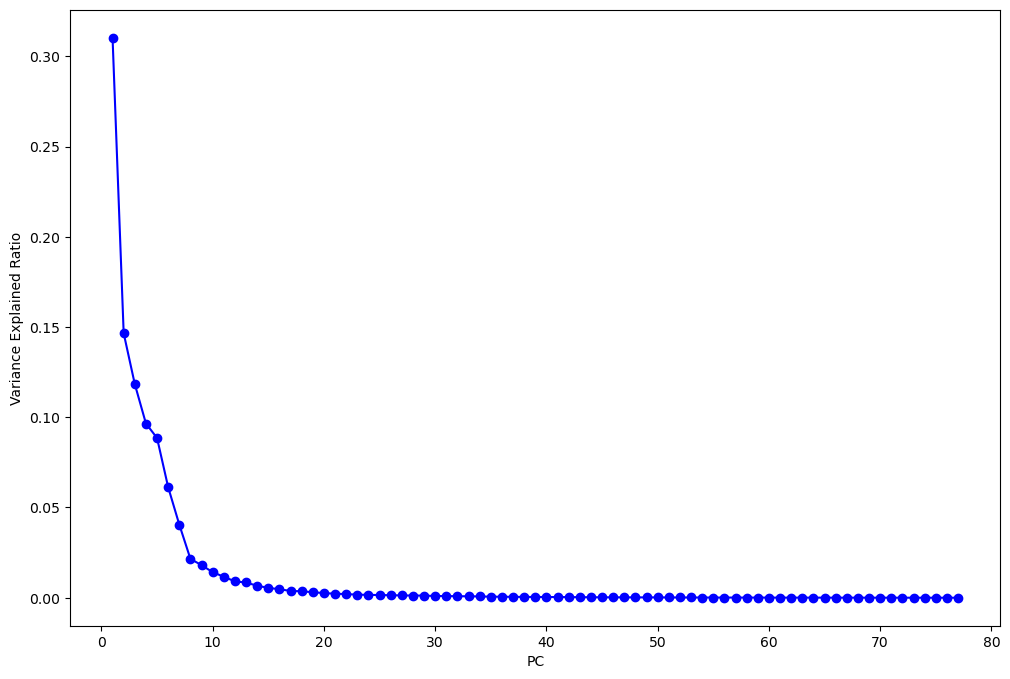

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot( np.arange( len(pca_object.explained_variance_ratio_ ) )+1, pca_object.explained_variance_ratio_, 'bo-')

ax.set_xlabel('PC')
ax.set_ylabel('Variance Explained Ratio')

plt.show()

In [105]:
total_var_explain = pca_object.explained_variance_ratio_.cumsum()

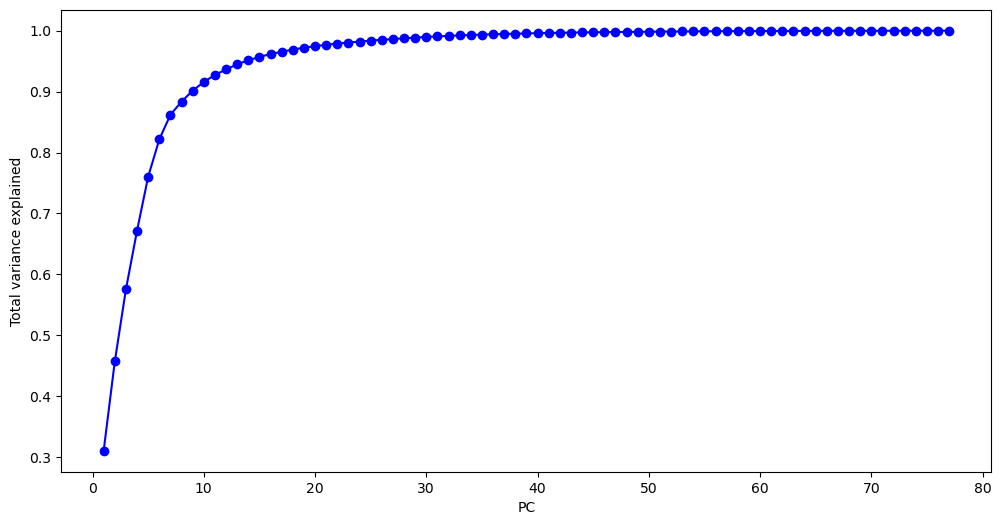

In [106]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot( np.arange( len(total_var_explain) ) + 1, total_var_explain, 'bo-')

ax.set_xlabel('PC')
ax.set_ylabel('Total variance explained')

plt.show()

In [107]:
pc_scores_df = pd.DataFrame( pc_scores, columns=['PC' + str(d+1).zfill(2) for d in range( pc_scores.shape[1]) ] )

In [108]:
pc_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC01    653 non-null    float64
 1   PC02    653 non-null    float64
 2   PC03    653 non-null    float64
 3   PC04    653 non-null    float64
 4   PC05    653 non-null    float64
 5   PC06    653 non-null    float64
 6   PC07    653 non-null    float64
 7   PC08    653 non-null    float64
 8   PC09    653 non-null    float64
 9   PC10    653 non-null    float64
 10  PC11    653 non-null    float64
 11  PC12    653 non-null    float64
 12  PC13    653 non-null    float64
 13  PC14    653 non-null    float64
 14  PC15    653 non-null    float64
 15  PC16    653 non-null    float64
 16  PC17    653 non-null    float64
 17  PC18    653 non-null    float64
 18  PC19    653 non-null    float64
 19  PC20    653 non-null    float64
 20  PC21    653 non-null    float64
 21  PC22    653 non-null    float64
 22  PC

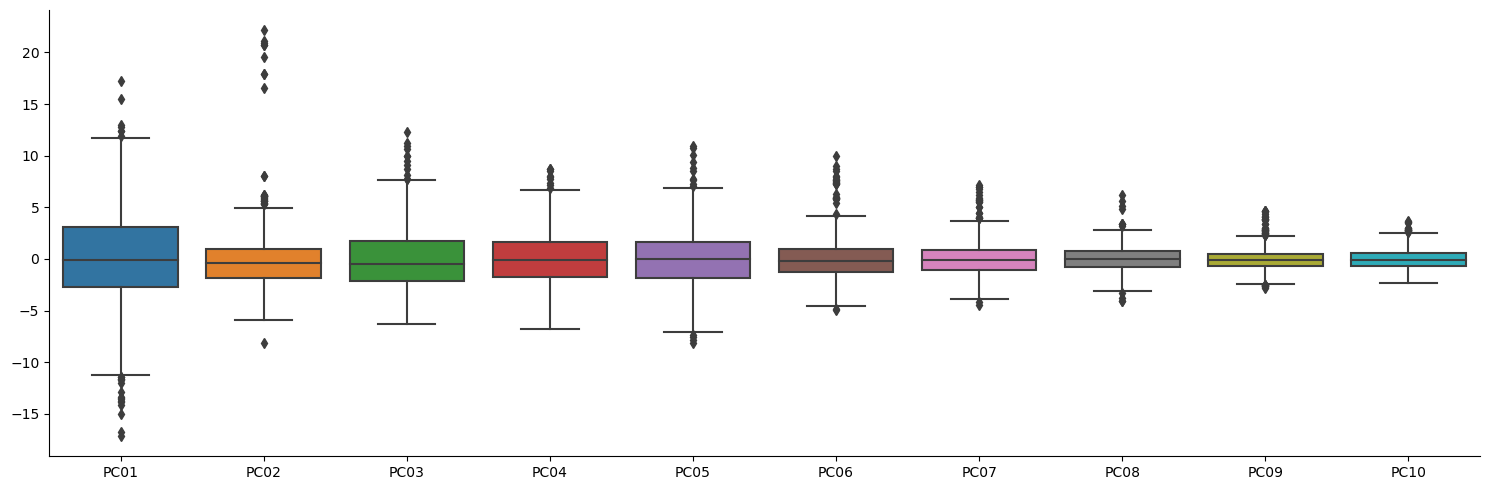

In [109]:
sns.catplot(data = pc_scores_df.iloc[:, :10], kind='box', aspect=3)

plt.show()

In [110]:
def calc_pca_contrib(load_mat):
    # square each element in the loadings matrix
    load_mat_sq = load_mat ** 2
    # sum the square loadings for each PC
    sum_load_squares = load_mat_sq.sum(axis=0)
    # divide the square loadings by the sum of the squared loadings per PC
    contrib_mat = load_mat_sq / sum_load_squares
    
    return(contrib_mat)

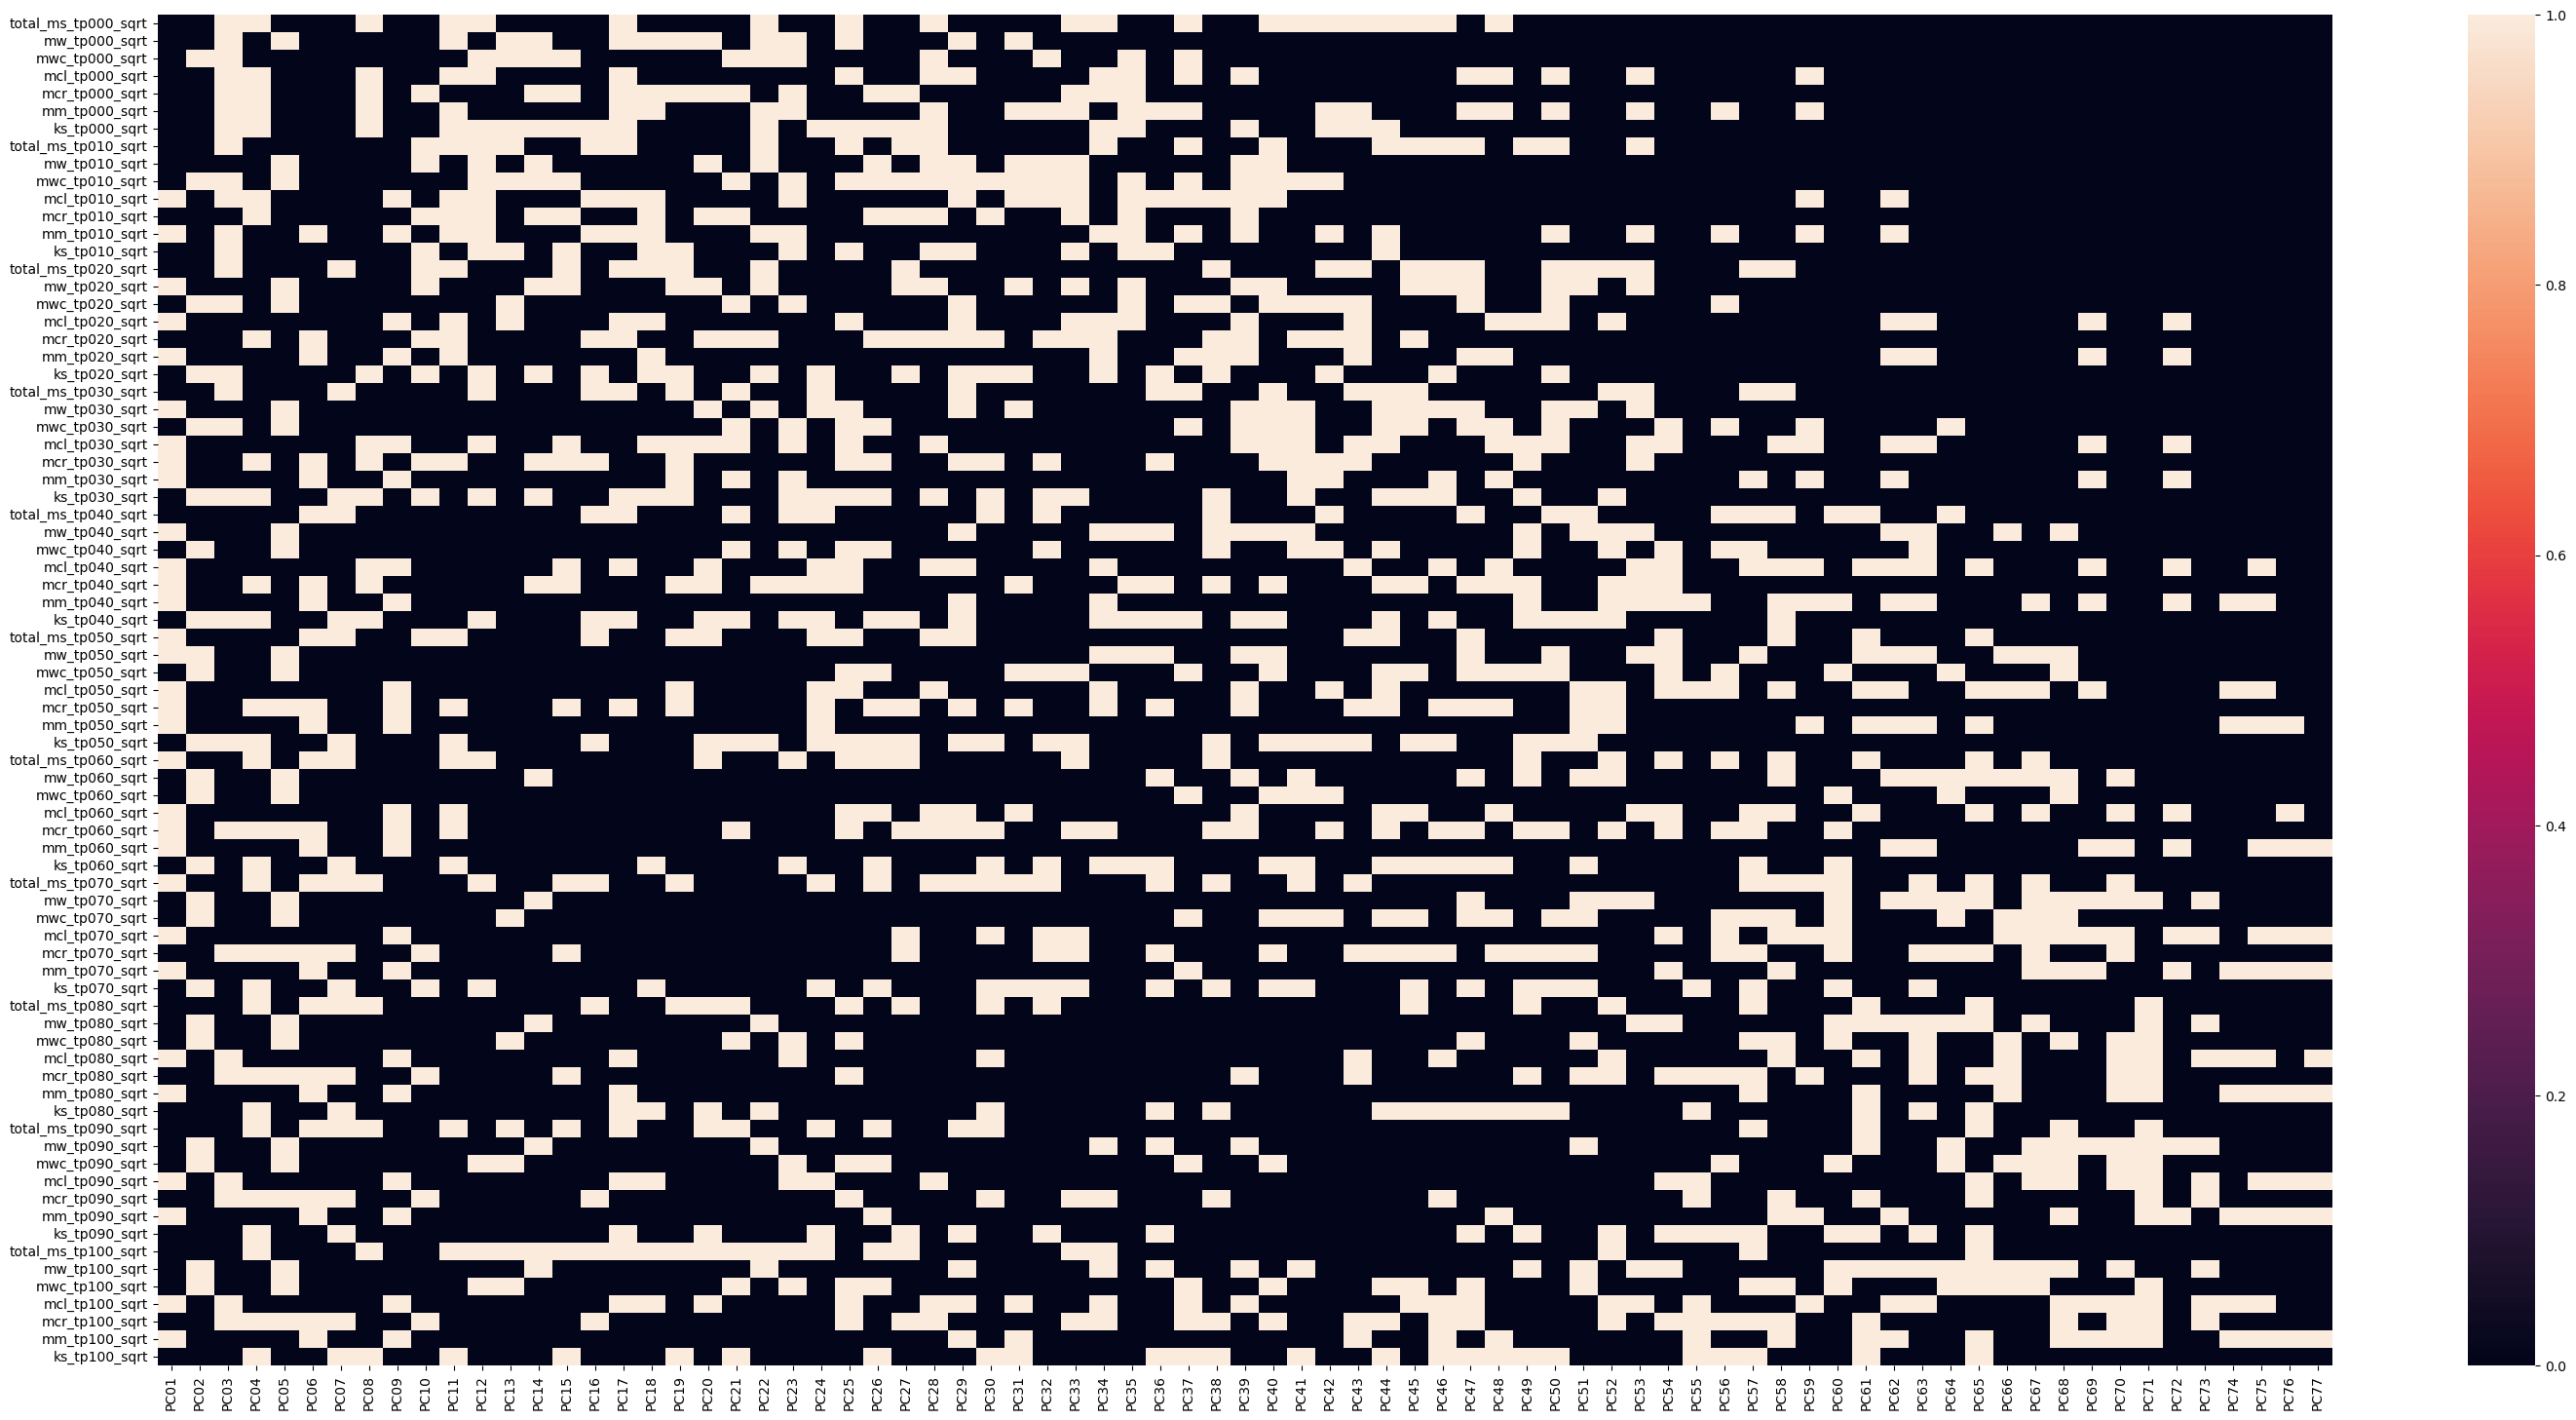

In [111]:
fig, ax = plt.subplots(figsize=(36, 18))

sns.heatmap( data = np.transpose( calc_pca_contrib( pca_object.components_) ) > (1 / pc_scores.shape[1]), 
            xticklabels=pc_scores_df.iloc[:, :len(num_vars)].columns.tolist(),
            yticklabels=num_vars,
            vmin=0, vmax=1)

plt.show()

##### Continuous preprocessor and pipelines for pairwise polynomials with PCA

In [112]:
numeric_transform_pca = Pipeline( steps=[('std_input', StandardScaler()),
                                        ('pca', PCA(n_components=15)),
                                        ('make_poly', PolynomialFeatures(degree=2, include_bias=False))])

In [113]:
complex_transform = ColumnTransformer( transformers=[('num', numeric_transform_pca, num_vars),
                                                    ('cat', categorical_transform, categorical_inputs)])

In [114]:
complex_transform.transformers

[('num',
  Pipeline(steps=[('std_input', StandardScaler()), ('pca', PCA(n_components=15)),
                  ('make_poly', PolynomialFeatures(include_bias=False))]),
  ['total_ms_tp000_sqrt',
   'mw_tp000_sqrt',
   'mwc_tp000_sqrt',
   'mcl_tp000_sqrt',
   'mcr_tp000_sqrt',
   'mm_tp000_sqrt',
   'ks_tp000_sqrt',
   'total_ms_tp010_sqrt',
   'mw_tp010_sqrt',
   'mwc_tp010_sqrt',
   'mcl_tp010_sqrt',
   'mcr_tp010_sqrt',
   'mm_tp010_sqrt',
   'ks_tp010_sqrt',
   'total_ms_tp020_sqrt',
   'mw_tp020_sqrt',
   'mwc_tp020_sqrt',
   'mcl_tp020_sqrt',
   'mcr_tp020_sqrt',
   'mm_tp020_sqrt',
   'ks_tp020_sqrt',
   'total_ms_tp030_sqrt',
   'mw_tp030_sqrt',
   'mwc_tp030_sqrt',
   'mcl_tp030_sqrt',
   'mcr_tp030_sqrt',
   'mm_tp030_sqrt',
   'ks_tp030_sqrt',
   'total_ms_tp040_sqrt',
   'mw_tp040_sqrt',
   'mwc_tp040_sqrt',
   'mcl_tp040_sqrt',
   'mcr_tp040_sqrt',
   'mm_tp040_sqrt',
   'ks_tp040_sqrt',
   'total_ms_tp050_sqrt',
   'mw_tp050_sqrt',
   'mwc_tp050_sqrt',
   'mcl_tp050_sqrt',
 

In [115]:
complex_transform.fit_transform( s2_df ).shape

(653, 144)

No interactions - that is why the features do not equal the dmatrices

In [116]:
interaction_transform = Pipeline( steps=[ ('prepro', complex_transform),
                                            ('make_interact', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))])

In [117]:
interaction_transform.fit_transform( s2_df ).shape

(653, 10440)

In [118]:
default_enet_complex_wflow = Pipeline( steps=[('prepro', complex_transform),
                                              ('enet', enet_default)])

In [119]:
#default_enet_complex_cv_scores = cross_val_score( default_enet_complex_wflow, s2_df, y_train, cv=my_cv )

In [120]:
numeric_transform_pca_b = Pipeline( steps=[('std_input', StandardScaler()),
                                        ('pca', PCA(n_components=15)),
                                        ('make_poly', PolynomialFeatures(degree=2, include_bias=False)),
                                        ('std_features', StandardScaler())])

In [121]:
complex_transform_b = ColumnTransformer( transformers=[('num', numeric_transform_pca_b, num_vars),
                                                    ('cat', categorical_transform, categorical_inputs)])

In [122]:
default_enet_complex_wflow_b = Pipeline( steps=[('prepro', complex_transform_b),
                                              ('enet', enet_default)])

In [123]:
#default_enet_complex_cv_scores_b = cross_val_score( default_enet_complex_wflow_b, s2_df, y_train, cv=my_cv )